# Surprise-Housing-Australia:
### Probem statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company wants to know:
- 
Which variables are significant in predicting the price of a house, a .<br>d- 

How well those variables describe the price of a house.
 
### Business Goal:
Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectatiomodel the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
ns.

### Steps:
  (1) Data loading.<br>
  (2) Data cleaning.<br>
  (3) Data analysis and manipulations.<br>
  (4) Data split in Train,test.<br>
  (5) Scaling train data.<br>
  (6) Feature selection<br>
  (7) Model trai using regularizationning.<br>
  (8) Analyzmodel parameters and alphaters.<br>
  (9) Analizing assumptions.<br>
  (10) Scaling test dataset.<br>
  (11) Prediction on test set.<br>
  (12) Analyzing predictions.<br>

In [1]:
# Importing nessasary python libraries
# importing basic libraries for data reading and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Importing libraries for model devolopment
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data loading:

In [2]:
df_housing = pd.read_csv("train.csv")
df_housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
df_housing.shape

(1460, 81)

As per input data, we can observe the following points:
 - There are 1460 entries or data points from input provided
 - Data has 81 inital columns including independent and dependent target variable 'SalePrice'.

## Univariate analysis and Data cleaning:

As per observation from initial data there are several none(NA) values present in data. But as per data dictionary NA referes to catagory for some variables. 

In [6]:
# Function to create dummy variables from column to reduce code length
def make_dummys(df, column_name, drop_column=None):
    if drop_column is None:
        df_dummys = pd.get_dummies(df[column_name],drop_first = True)
    else:
        df_dummys = pd.get_dummies(df[column_name]).drop(drop_column, axis=1)
    df_dummys = df_dummys.astype(int)
    df = pd.concat([df, df_dummys], axis = 1)
    # now drop input column name column from data
    df = df.drop(column_name, axis=1)
    return df

### Univariate analysis on continuous variables:

In [7]:
#Function to plot continuous variables
def plot_continuous_var(df, column=None, target=None, hue=None ):
    print("Null values in "+column+" :" ,df[column].isna().sum())
    print("Correlation between "+column+","+target +"is: ", df[column].corr(df[target]))
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]}, figsize=(10,5))
    plt.subplots_adjust(wspace=0.3)
    plt.subplot(1, 2, 1)
    sns.boxplot(y = column ,data = df)
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x=column, y=target, hue=hue)
    plt.show()

#### Id:
As per data in column Id is property identification number/serial number so we can remove this column from analysis.

In [8]:
df_housing = df_housing.drop('Id', axis=1)

#### SalePrice:
Target variable

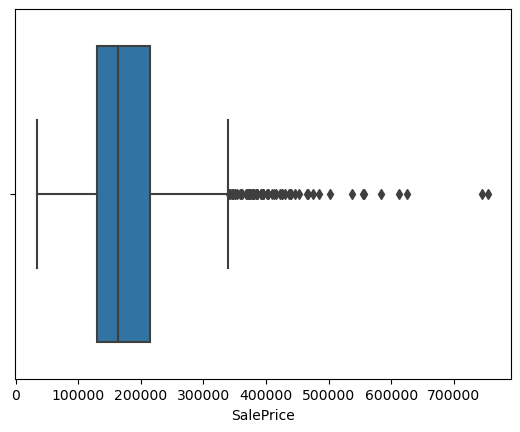

In [9]:
sns.boxplot(x = 'SalePrice' ,data = df_housing)
plt.show()

#### LotFrontage:
Numerical variable.
Linear feet of street connected to property. This columns contains null values.

Null values in LotFrontage : 259
Correlation between LotFrontage,SalePriceis:  0.35179909657067804


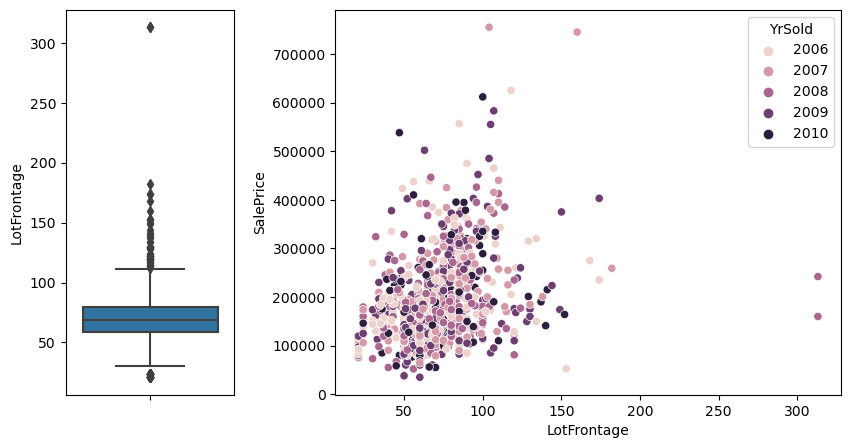

In [10]:
plot_continuous_var(df_housing , column='LotFrontage', target='SalePrice', hue = 'YrSold')

In [11]:
# Imputing null values with median value
df_housing.LotFrontage = df_housing.LotFrontage.fillna(df_housing.LotFrontage.median())
print(len(df_housing[df_housing.LotFrontage > 125]))
# Droping outlier rows with LotFrontage more then 125
df_housing =  df_housing[df_housing.LotFrontage < 125]
df_housing.shape

24


(1436, 80)

#### LotArea:
Lot size in square feet

Null values in LotArea : 0
Correlation between LotArea,SalePriceis:  0.2762958178328449


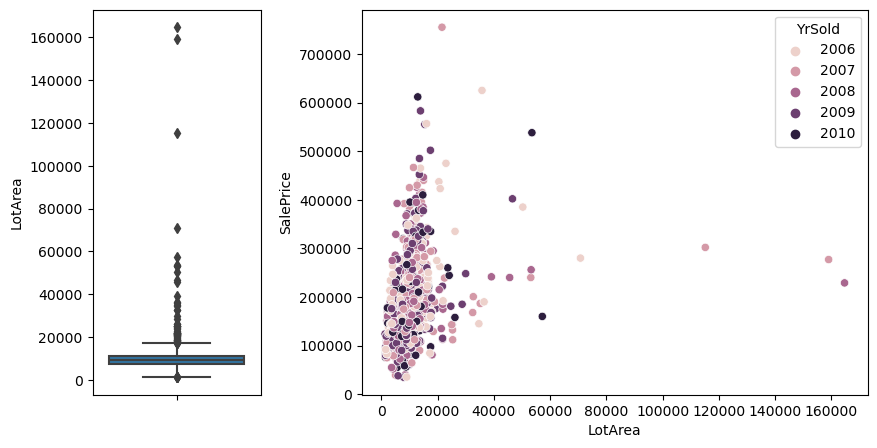

In [12]:
plot_continuous_var(df_housing , column='LotArea', target='SalePrice', hue = 'YrSold')

In [13]:
print(len(df_housing[df_housing.LotArea > 20000]))
# Droping outlier rows with LotArea more then 20000 sq feet
df_housing =  df_housing[df_housing.LotArea < 20000]
df_housing.shape

45


(1391, 80)

#### MasVnrArea: 
Masonry veneer area in square feet

Null values in MasVnrArea : 7
Correlation between MasVnrArea,SalePriceis:  0.46757559696249773


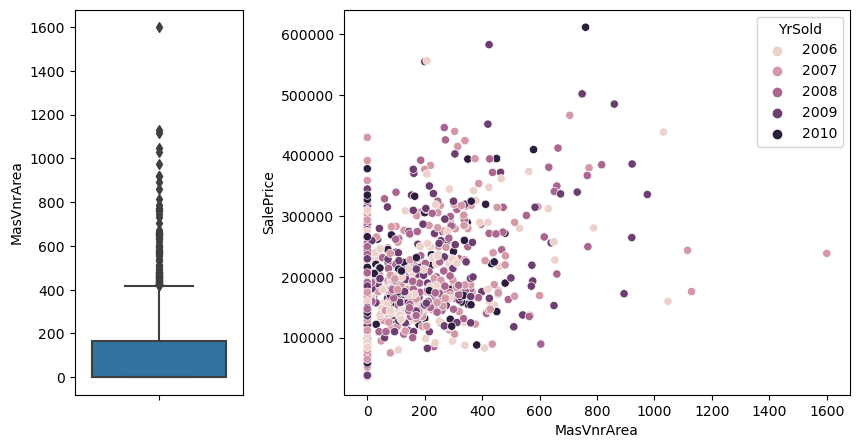

In [14]:
plot_continuous_var(df_housing , column='MasVnrArea', target='SalePrice', hue = 'YrSold')

In [15]:
# Removing rows where null values present
df_housing = df_housing[~df_housing.MasVnrArea.isna()]
# Removing outliers which value more then 750
df_housing = df_housing[df_housing.MasVnrArea < 750]
df_housing.shape

(1368, 80)

#### BsmtFinSF1: 
Type 1 finished square feet

Null values in BsmtFinSF1 : 0
Correlation between BsmtFinSF1,SalePriceis:  0.37579200965696974


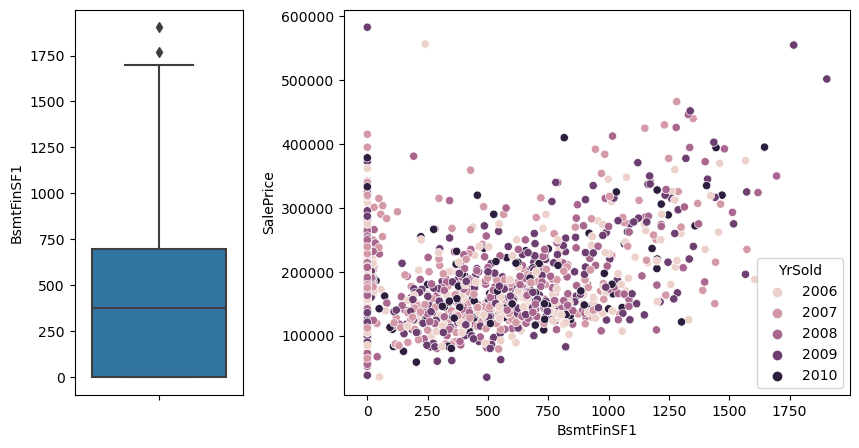

In [16]:
plot_continuous_var(df_housing , column='BsmtFinSF1', target='SalePrice', hue = 'YrSold')

In [17]:
# Removing outliers which value more then 750
df_housing = df_housing[df_housing.BsmtFinSF1 < 1750]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1366, 80)


#### BsmtFinSF2:
Type 2 finished square feet

Null values in BsmtFinSF2 : 0
Correlation between BsmtFinSF2,SalePriceis:  -0.02462697992116135


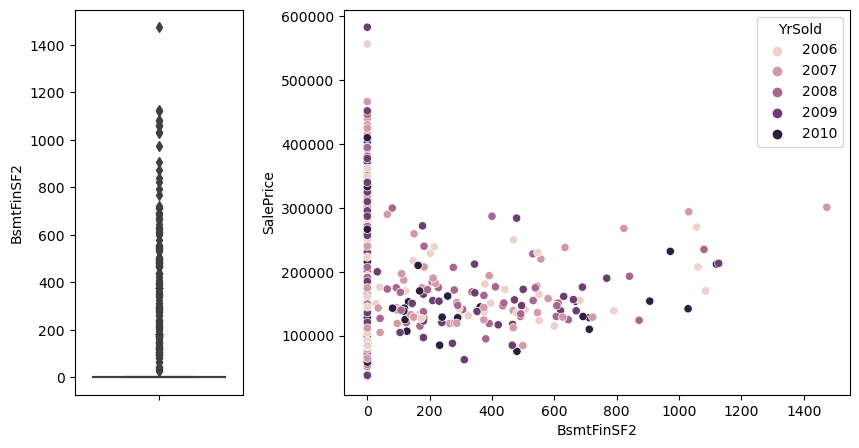

In [18]:
plot_continuous_var(df_housing , column='BsmtFinSF2', target='SalePrice', hue = 'YrSold')

From the above observation most of the values in 'BsmtFinSF2' column values are 0. So we can ignore this variable from our analysis

In [19]:
df_housing = df_housing.drop('BsmtFinSF2', axis=1)
df_housing.shape

(1366, 79)

#### BsmtUnfSF: 
Unfinished square feet of basement area

Null values in BsmtUnfSF : 0
Correlation between BsmtUnfSF,SalePriceis:  0.24072053003354005


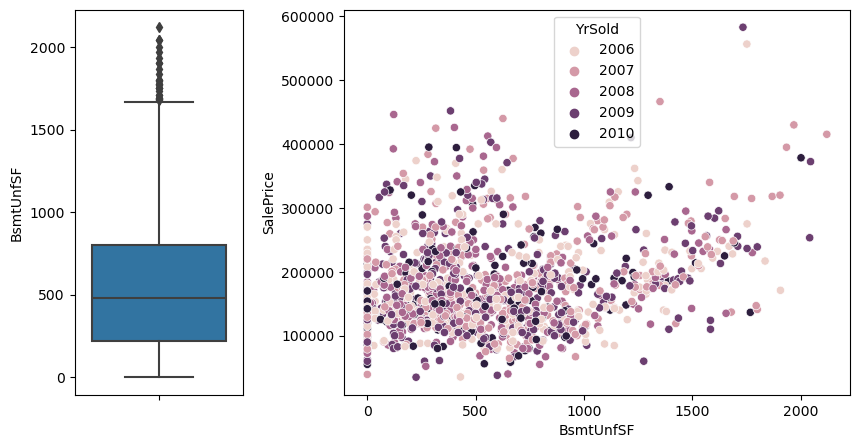

In [20]:
plot_continuous_var(df_housing , column='BsmtUnfSF', target='SalePrice', hue = 'YrSold')

#### TotalBsmtSF: 
Total square feet of basement area

Null values in TotalBsmtSF : 0
Correlation between TotalBsmtSF,SalePriceis:  0.6286771769648969


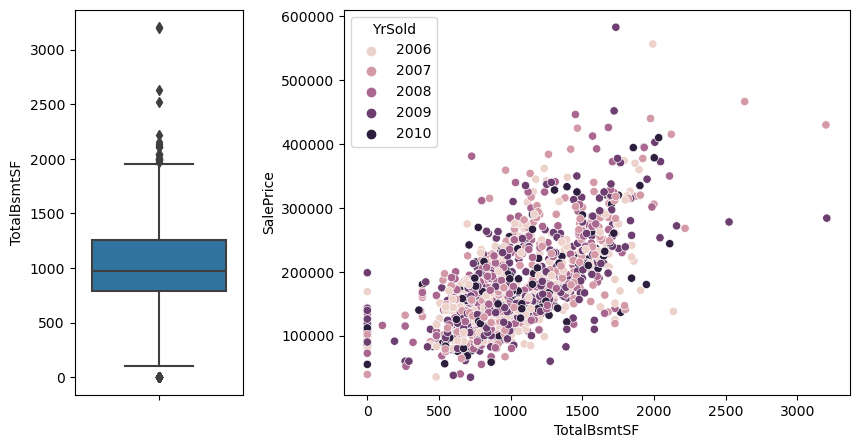

In [21]:
plot_continuous_var(df_housing , column='TotalBsmtSF', target='SalePrice', hue = 'YrSold')

In [22]:
# Removing outliers which value more then 2400
df_housing = df_housing[df_housing.TotalBsmtSF < 2400]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1362, 79)


#### 1stFlrSF:
First Floor square feet

Null values in 1stFlrSF : 0
Correlation between 1stFlrSF,SalePriceis:  0.6011169459527455


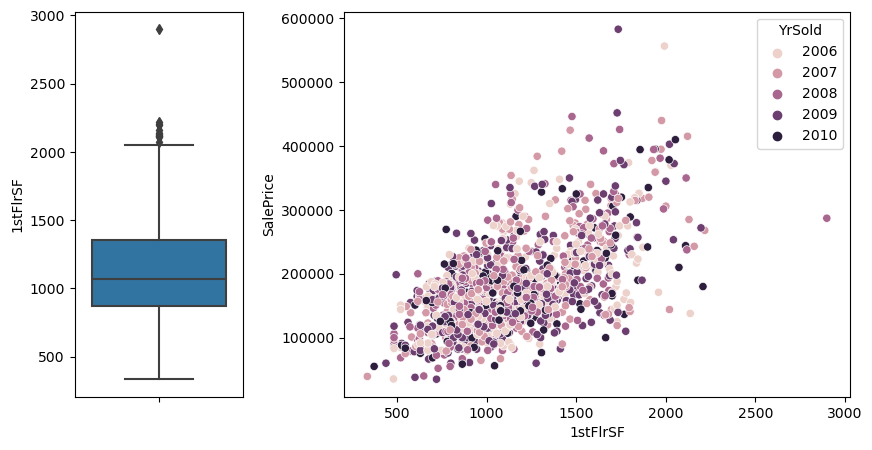

In [23]:
plot_continuous_var(df_housing , column='1stFlrSF', target='SalePrice', hue = 'YrSold')

In [24]:
# Removing outliers which value more then 2500
df_housing = df_housing[df_housing['1stFlrSF'] < 2500]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1361, 79)


#### 2ndFlrSF: 
Second floor square feet

Null values in 2ndFlrSF : 0
Correlation between 2ndFlrSF,SalePriceis:  0.30201680209903004


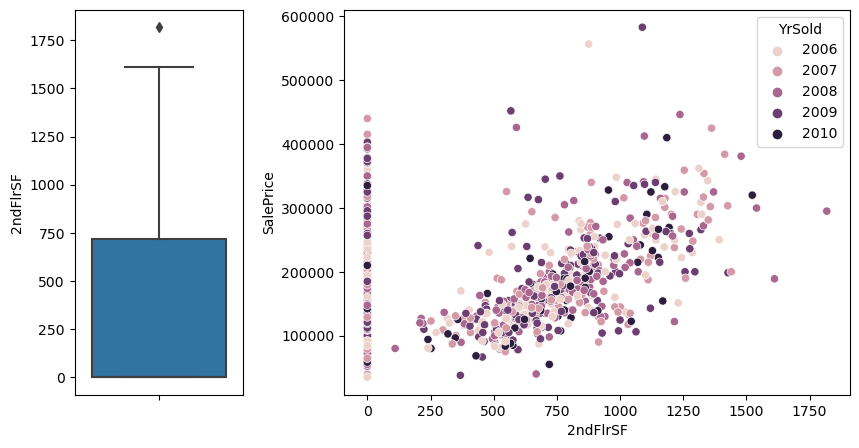

In [25]:
plot_continuous_var(df_housing , column='2ndFlrSF', target='SalePrice', hue = 'YrSold')

In [26]:
# Removing outliers which value more then 1750
df_housing = df_housing[df_housing['2ndFlrSF'] < 1750]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1360, 79)


#### LowQualFinSF: 
Low quality finished square feet (all floors)

Null values in LowQualFinSF : 0
Correlation between LowQualFinSF,SalePriceis:  -0.06987058579228769


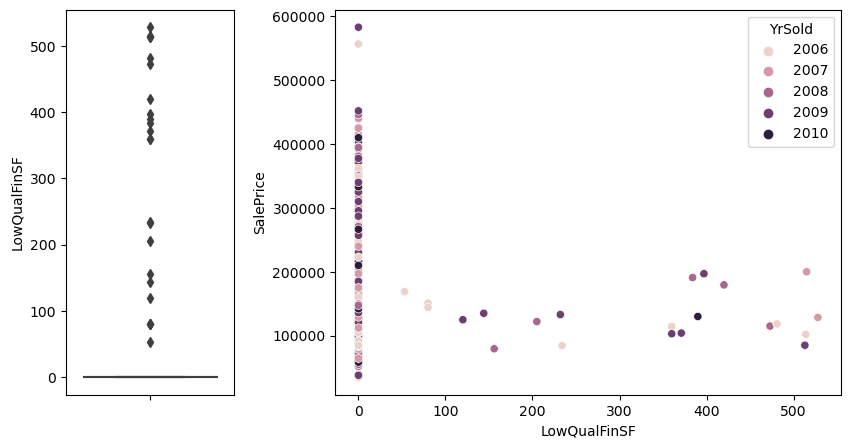

In [27]:
plot_continuous_var(df_housing , column='LowQualFinSF', target='SalePrice', hue = 'YrSold')

In [28]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('LowQualFinSF', axis=1)
df_housing.shape

(1360, 78)

#### GrLivArea: 
Above grade (ground) living area square feet

Null values in GrLivArea : 0
Correlation between GrLivArea,SalePriceis:  0.7002819185322293


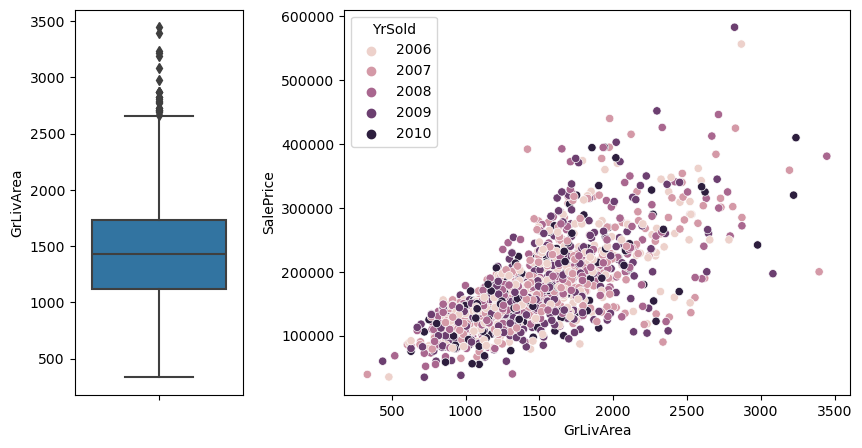

In [29]:
plot_continuous_var(df_housing , column='GrLivArea', target='SalePrice', hue = 'YrSold')

In [30]:
# Removing outliers which value more then 2750
df_housing = df_housing[df_housing['GrLivArea'] < 2750]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1344, 78)


#### GarageArea: 
Size of garage in square feet

Null values in GarageArea : 0
Correlation between GarageArea,SalePriceis:  0.637923244339756


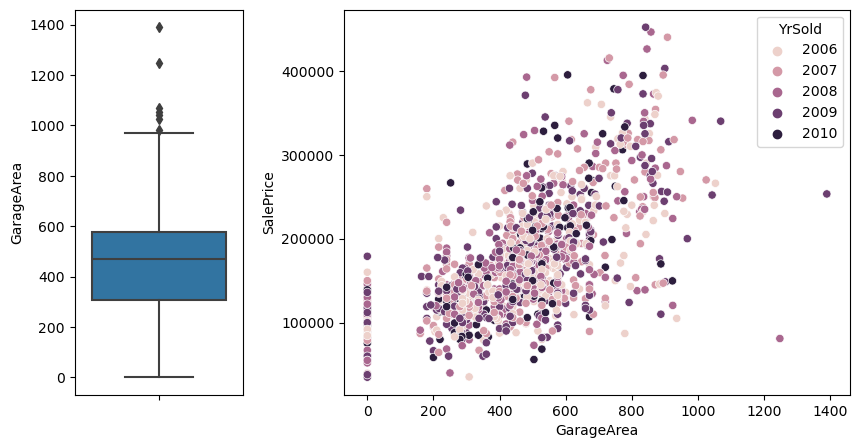

In [31]:
plot_continuous_var(df_housing , column='GarageArea', target='SalePrice', hue = 'YrSold')

In [32]:
# Removing outliers which value more then 2750
df_housing = df_housing[df_housing['GarageArea'] < 1200]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1342, 78)


#### WoodDeckSF:
Wood deck area in square feet

Null values in WoodDeckSF : 0
Correlation between WoodDeckSF,SalePriceis:  0.3128040224589446


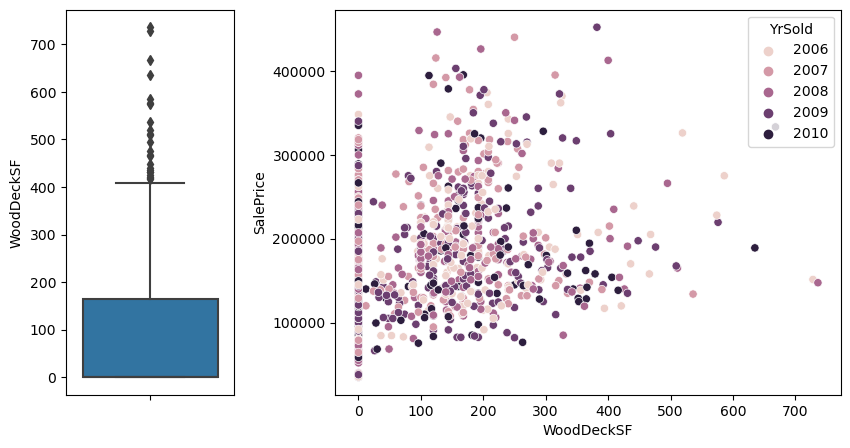

In [33]:
plot_continuous_var(df_housing , column='WoodDeckSF', target='SalePrice', hue = 'YrSold')

In [34]:
# Removing outliers which value more then 550
df_housing = df_housing[df_housing['WoodDeckSF'] < 550]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1335, 78)


#### OpenPorchSF: 
Open porch area in square feet

Null values in OpenPorchSF : 0
Correlation between OpenPorchSF,SalePriceis:  0.334745998671128


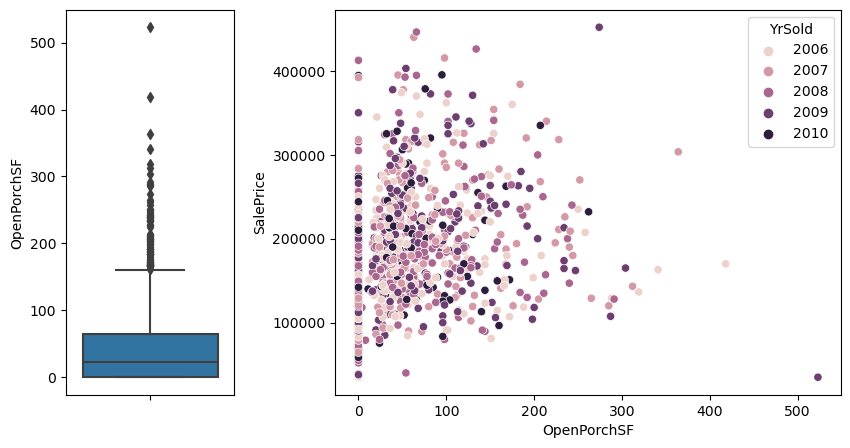

In [35]:
plot_continuous_var(df_housing , column='OpenPorchSF', target='SalePrice', hue = 'YrSold')

In [36]:
# Removing outliers which value more then 300
df_housing = df_housing[df_housing['OpenPorchSF'] < 300]
print("Shape of the data:", df_housing.shape)

Shape of the data: (1328, 78)


#### EnclosedPorch: 
Enclosed porch area in square feet

Null values in EnclosedPorch : 0
Correlation between EnclosedPorch,SalePriceis:  -0.15654613285641159


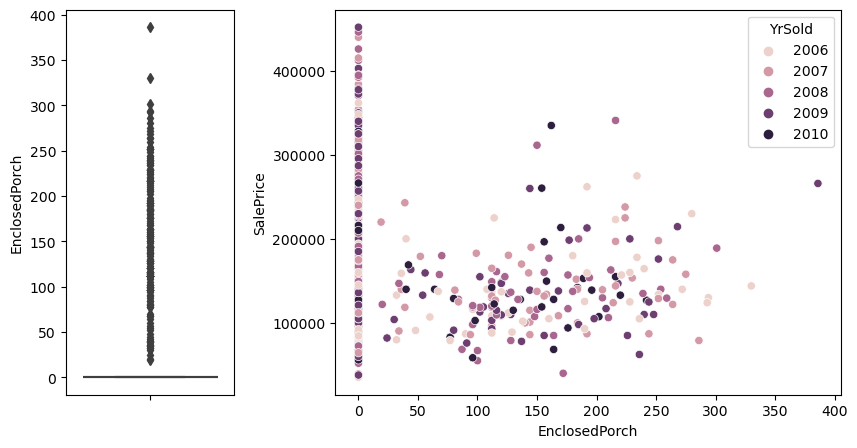

In [37]:
plot_continuous_var(df_housing , column='EnclosedPorch', target='SalePrice', hue = 'YrSold')

In [38]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('EnclosedPorch', axis=1)
df_housing.shape

(1328, 77)

#### 3SsnPorch: 
Three season porch area in square feet

Null values in 3SsnPorch : 0
Correlation between 3SsnPorch,SalePriceis:  0.055387407274240144


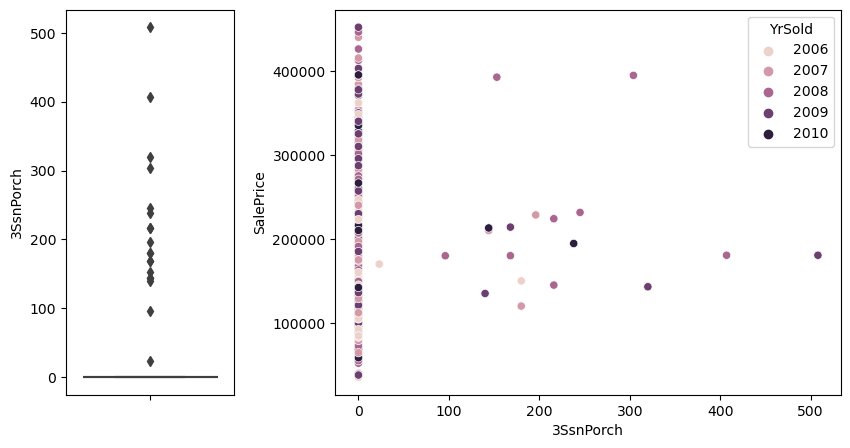

In [39]:
plot_continuous_var(df_housing , column='3SsnPorch', target='SalePrice', hue = 'YrSold')

In [40]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('3SsnPorch', axis=1)
df_housing.shape

(1328, 76)

#### ScreenPorch: 
Screen porch area in square feet

Null values in ScreenPorch : 0
Correlation between ScreenPorch,SalePriceis:  0.09314894588596631


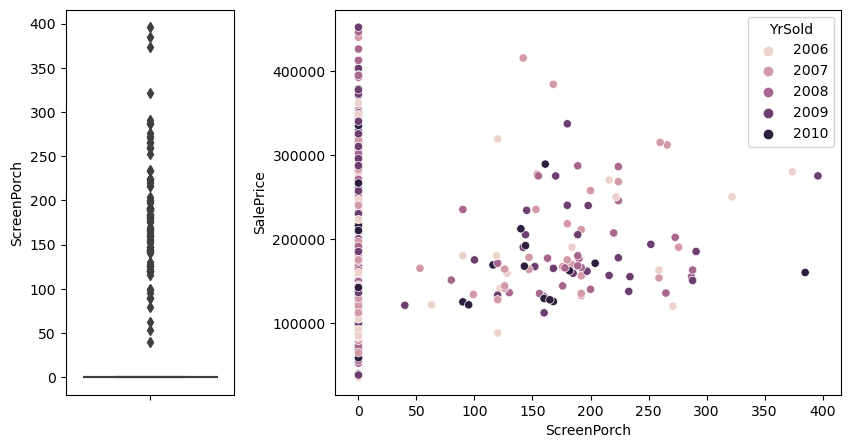

In [41]:
plot_continuous_var(df_housing , column='ScreenPorch', target='SalePrice', hue = 'YrSold')

In [42]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('ScreenPorch', axis=1)
df_housing.shape

(1328, 75)

#### PoolArea: 
Pool area in square feet

Null values in PoolArea : 0
Correlation between PoolArea,SalePriceis:  0.0024560988715618183


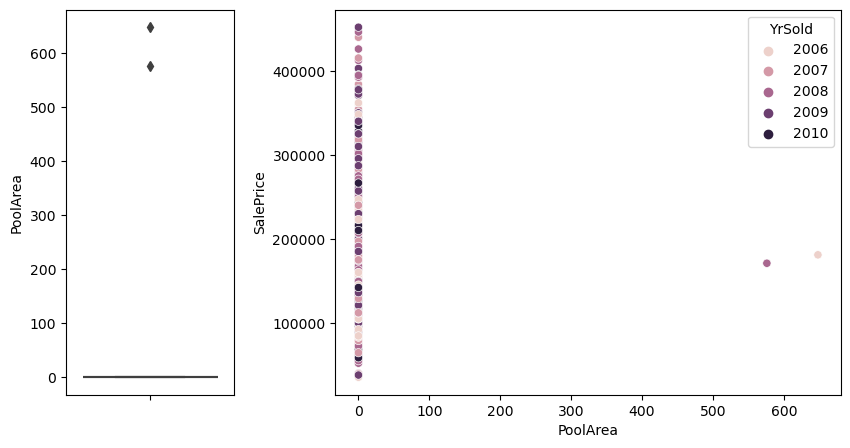

In [43]:
plot_continuous_var(df_housing , column='PoolArea', target='SalePrice', hue = 'YrSold')

In [44]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('PoolArea', axis=1)
df_housing.shape

(1328, 74)

#### MiscVal: 
$Value of miscellaneous feature


In [45]:
plot_continuous_var(df_housing , column='MiscVal', target='SalePrice', hue = 'YrSold')

Null values in MiscVal : 0
Correlation between MiscVal,SalePriceis:  -0.02122804008344018


In [46]:
# Drop the column from analysis because most of the LowQualFinSF column values are 0
df_housing = df_housing.drop('MiscVal', axis=1)
df_housing.shape

(1328, 73)

### Univariate analysis on continuous catagorical variables:

In [47]:
def plot_concat_var(df, column_name=None, target=None, hue=None , plot_type='Box'):
    print("Null values in "+column_name+" :" ,df[column_name].isna().sum())    
    if plot_type == 'Box':
        sns.catplot(data=df, x=column_name, y=target, kind="box")
        plt.xticks(rotation=90)
        plt.show()
    elif plot_type == 'Bar':
        pt = pd.pivot_table(df, values=target, index=column_name, columns=hue, aggfunc='mean')
        pt.plot(kind='bar', rot=90,  ylabel=target, title=target+" Vs "+column_name)
        plt.legend( bbox_to_anchor=(1.25, 1.0),loc='upper right')
        
#Function to plot continuous variables
def plot_scatter(df, column=None, target=None, hue=None ):
    print("Correlation between "+column+","+target +"is: ", df[column].corr(df[target]))
    sns.scatterplot(data=df, x=column, y=target, hue=hue)
    plt.show()

#### Fence: 
Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [48]:
df_housing.Fence = df_housing.Fence.fillna('No_fence')
plot_concat_var(df_housing, column_name='Fence', target='SalePrice' )#,hue='YrSold'

Null values in Fence : 0


In [49]:
# Map Fence values to ordered integers as follows
df_housing.Fence = df_housing.Fence.map({'GdPrv':4, 
                                         'MnPrv':3,
                                         'GdWo':2,
                                         'MnWw':1,
                                         'No_fence':0
                                        })
df_housing.Fence = df_housing.Fence.astype(int)

#### PoolQC: 
Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Null values in PoolQC : 0


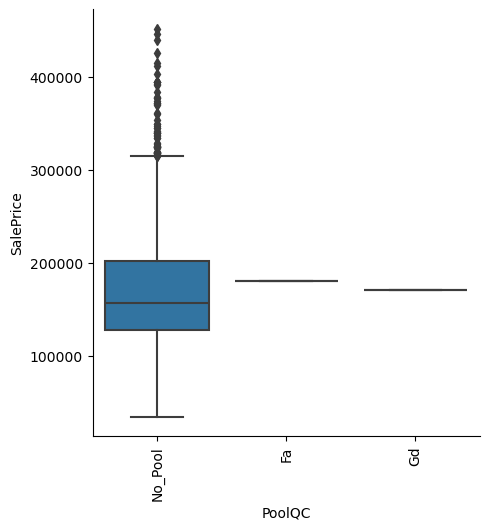

In [50]:
df_housing.PoolQC = df_housing.PoolQC.fillna('No_Pool')
plot_concat_var(df_housing, column_name='PoolQC', target='SalePrice' )#,hue='YrSold'

There are not much values present in Fa, Gd catagory so we can drop this column.

In [51]:
df_housing = df_housing.drop('PoolQC', axis=1)

#### Alley: 
Type of alley access to property
- Grvl	&emsp;Gravel
- Pave	&emsp;Paved
- NA 	&emsp;No alley access

This column contain null values which represents No Alley access to property.
we can make dummy variables from this column by mapping variable names as follows.

Null values in Alley : 0


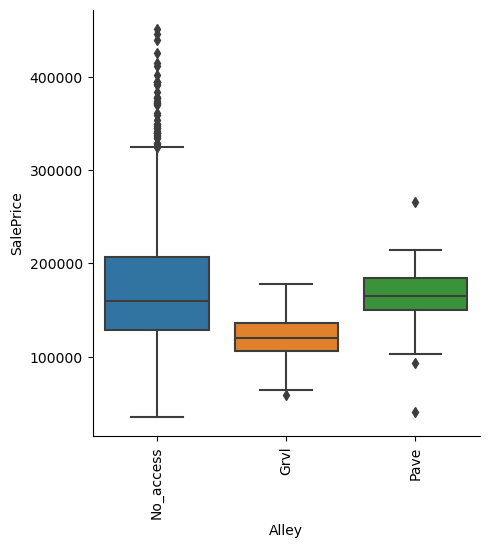

In [52]:
df_housing.Alley = df_housing.Alley.fillna('No_access')
plot_concat_var(df_housing, column_name='Alley', target='SalePrice' )#,hue='YrSold'

In [53]:
# Map Alley values to ordered integers as follows
df_housing.Alley = df_housing.Alley.map({'Pave':2,
                                         'Grvl':1,
                                         'No_access':0
                                        })
df_housing.Alley = df_housing.Alley.astype(int)

#### LotShape:
General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
There are no null values present in this column
We can make dummy variables from this catagorical variable as follows.

Null values in LotShape : 0


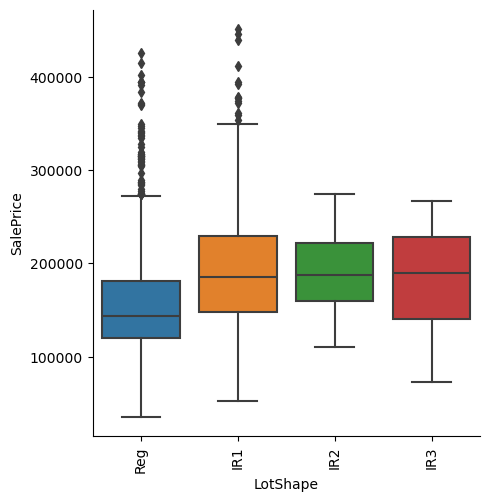

In [54]:
plot_concat_var(df_housing, column_name='LotShape', target='SalePrice' )#,hue='YrSold'

In [55]:
# Map LotShape values to ordered integers as follows
df_housing.LotShape = df_housing.LotShape.map({'Reg':3,
                                         'IR1':2,
                                         'IR2':1,
                                         'IR3':0
                                        })

df_housing.LotShape = df_housing.LotShape.astype(int)

Null values in OverallQual : 0


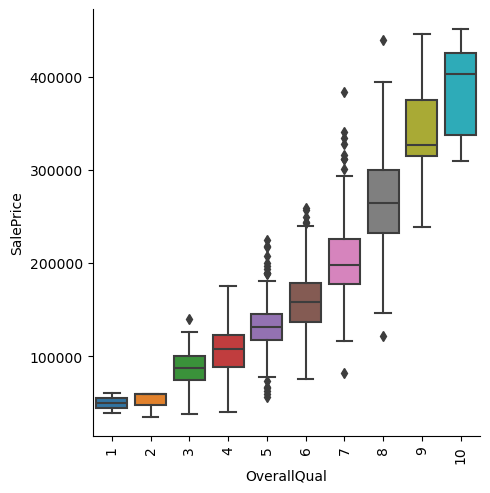

In [56]:
plot_concat_var(df_housing, column_name='OverallQual', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between 'OverallQual' and target variable.

#### OverallCond:
Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

Null values in OverallCond : 0


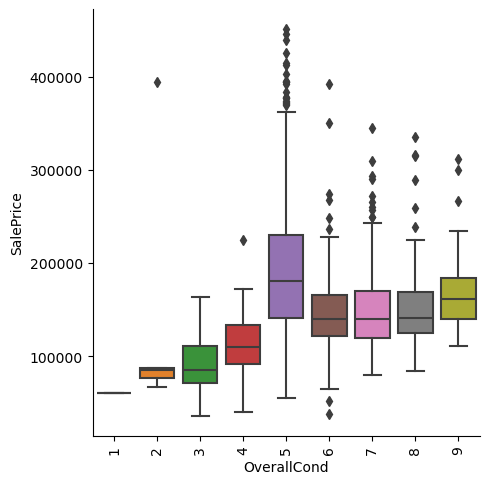

In [57]:
plot_concat_var(df_housing, column_name='OverallCond', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between 'OverallCond' and target variable.

#### YearBuilt: 
Original construction date
We can compute how old the property from current year for analysis, but this information will be extracted from scalling later.

Null values in YearBuilt : 0


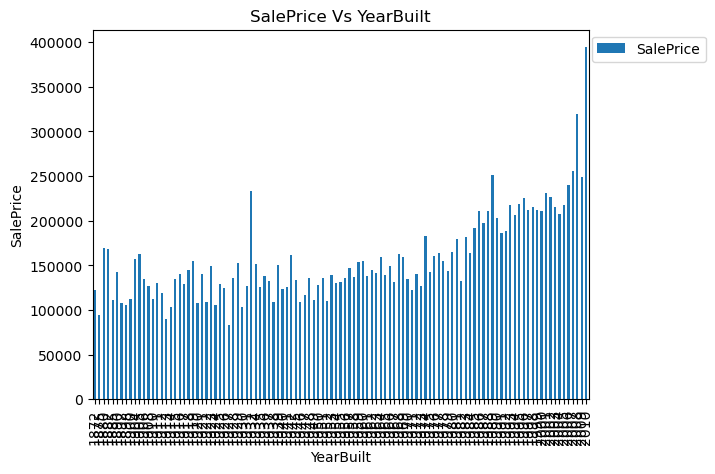

In [58]:
plot_concat_var(df_housing, column_name='YearBuilt', target='SalePrice' , plot_type="Bar")#,hue='YrSold'

From the plot we can observe that there is a clear increase in property price for newly built properties.

#### YearRemodAdd:
Remodel date (same as construction date if no remodeling or additions)

Null values in YearRemodAdd : 0


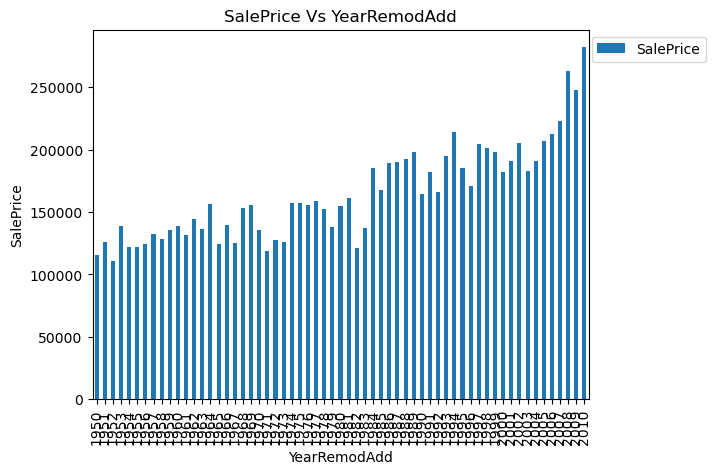

In [59]:
plot_concat_var(df_housing, column_name='YearRemodAdd', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

From the plot we can observe that there is a clear increase in property price for newly remodeled properties.

#### ExterQual: 
Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Null values in ExterQual : 0


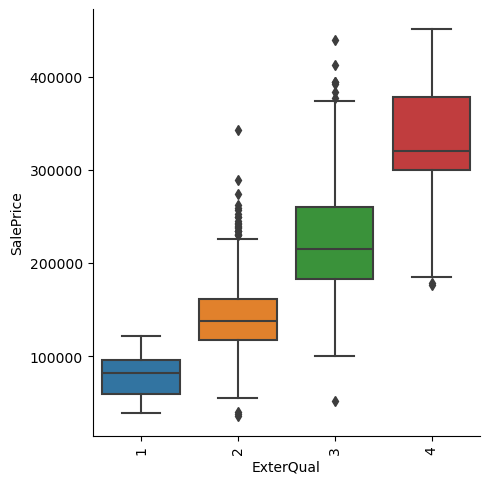

In [60]:
# Map ExterQual values to ordered integers as follows
df_housing.ExterQual = df_housing.ExterQual.map({'Ex':4,
                                                 'Gd':3,
                                                 'TA':2,
                                                 'Fa':1,
                                                 'Po':0
                                                })

df_housing.ExterQual = df_housing.ExterQual.astype(int)
plot_concat_var(df_housing, column_name='ExterQual', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between quality of the material on the exterior  and target variable.

#### ExterCond:
Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Null values in ExterCond : 0


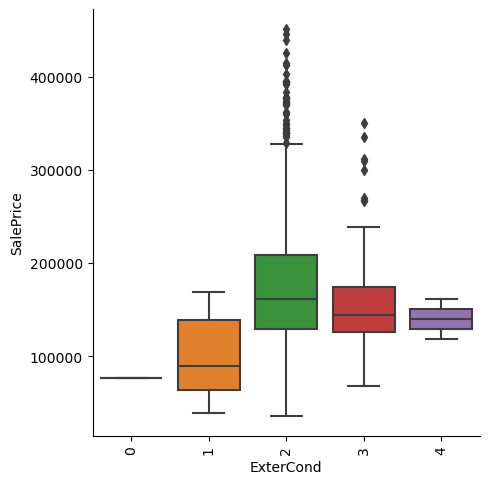

In [61]:
# Map ExterCond values to ordered integers as follows
df_housing.ExterCond = df_housing.ExterCond.map({'Ex':4,
                                                 'Gd':3,
                                                 'TA':2,
                                                 'Fa':1,
                                                 'Po':0
                                                })

df_housing.ExterCond = df_housing.ExterCond.astype(int)
plot_concat_var(df_housing, column_name='ExterCond', target='SalePrice' )#,hue='YrSold'

#### BsmtQual: 
Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

Null values in BsmtQual : 0


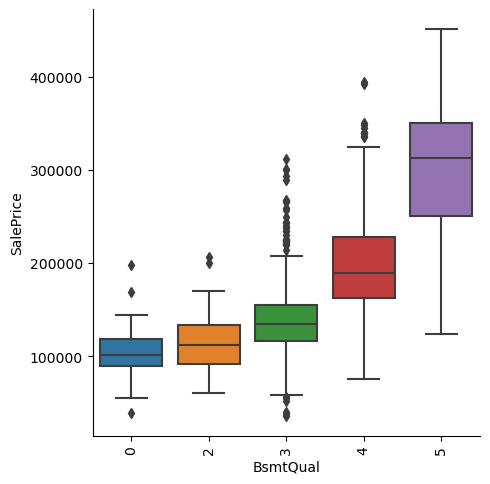

In [62]:
# Map BsmtQual values to ordered integers as follows
df_housing.BsmtQual = df_housing.BsmtQual.fillna('No_basement')
df_housing.BsmtQual = df_housing.BsmtQual.map({'Ex':5,
                                                 'Gd':4,
                                                 'TA':3,
                                                 'Fa':2,
                                                 'Po':1,
                                                 'No_basement':0
                                                })

df_housing.BsmtQual = df_housing.BsmtQual.astype(int)
plot_concat_var(df_housing, column_name='BsmtQual', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between height of the basement and target variable.

#### BsmtCond:
Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

Null values in BsmtCond : 0


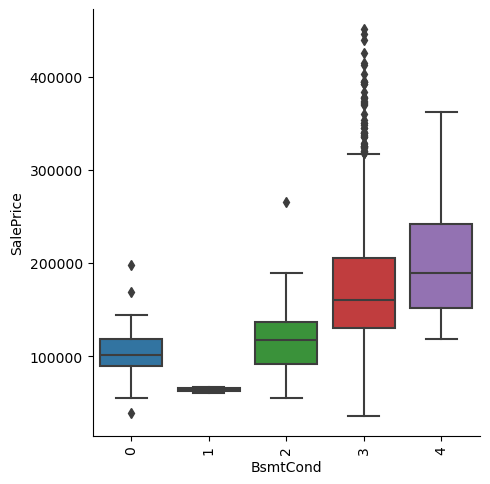

In [63]:
# Map BsmtCond values to ordered integers as follows
df_housing.BsmtCond = df_housing.BsmtCond.fillna('No_basement')
df_housing.BsmtCond = df_housing.BsmtCond.map({'Ex':5,
                                                 'Gd':4,
                                                 'TA':3,
                                                 'Fa':2,
                                                 'Po':1,
                                                 'No_basement':0
                                                })

df_housing.BsmtCond = df_housing.BsmtCond.astype(int)
plot_concat_var(df_housing, column_name='BsmtCond', target='SalePrice' )#,hue='YrSold'

#### BsmtExposure:
Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

Null values in BsmtExposure : 0


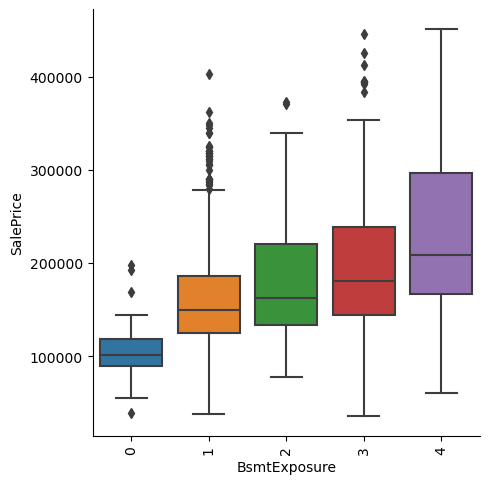

In [64]:
# Map BsmtExposure values to ordered integers as follows
df_housing.BsmtExposure = df_housing.BsmtExposure.fillna('No_basement')
df_housing.BsmtExposure = df_housing.BsmtExposure.map({
                                                 'Gd':4,
                                                 'Av':3,
                                                 'Mn':2,
                                                 'No':1,
                                                 'No_basement':0
                                                })

df_housing.BsmtExposure = df_housing.BsmtExposure.astype(int)
plot_concat_var(df_housing, column_name='BsmtExposure', target='SalePrice' )#,hue='YrSold'

#### BsmtFinType1:
Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Null values in BsmtFinType1 : 0


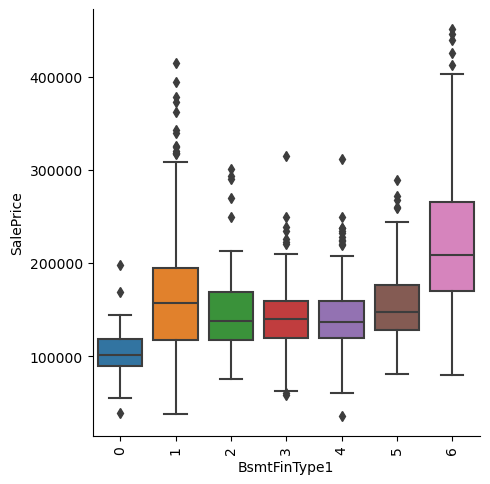

In [65]:
# Map BsmtFinType1 values to ordered integers as follows
df_housing.BsmtFinType1 = df_housing.BsmtFinType1.fillna('No_basement')
df_housing.BsmtFinType1 = df_housing.BsmtFinType1.map({'GLQ':6,
                                                       'ALQ':5,
                                                       'BLQ':4,
                                                       'Rec':3,
                                                       'LwQ':2,
                                                       'Unf':1,
                                                       'No_basement':0
                                                      })

df_housing.BsmtFinType1 = df_housing.BsmtFinType1.astype(int)
plot_concat_var(df_housing, column_name='BsmtFinType1', target='SalePrice' )#,hue='YrSold'

#### BsmtFinType2:
Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Null values in BsmtFinType2 : 0


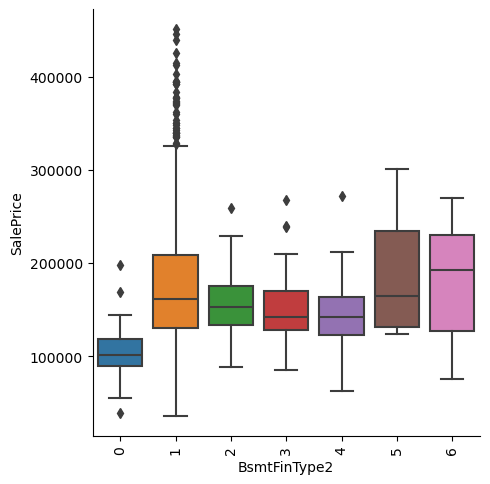

In [66]:
# Map BsmtFinType2 values to ordered integers as follows
df_housing.BsmtFinType2 = df_housing.BsmtFinType2.fillna('No_basement')
df_housing.BsmtFinType2 = df_housing.BsmtFinType2.map({'GLQ':6,
                                                       'ALQ':5,
                                                       'BLQ':4,
                                                       'Rec':3,
                                                       'LwQ':2,
                                                       'Unf':1,
                                                       'No_basement':0
                                                      })

df_housing.BsmtFinType2 = df_housing.BsmtFinType2.astype(int)
plot_concat_var(df_housing, column_name='BsmtFinType2', target='SalePrice' )#,hue='YrSold'

#### HeatingQC: 
Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Null values in HeatingQC : 0


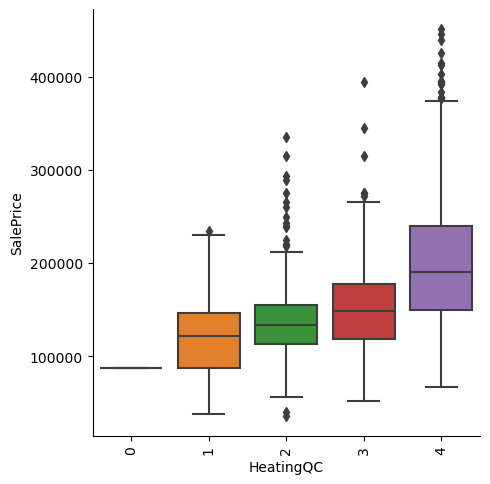

In [67]:
# Map HeatingQC values to ordered integers as follows
df_housing.HeatingQC = df_housing.HeatingQC.map({'Ex':4,
                                                 'Gd':3,
                                                 'TA':2,
                                                 'Fa':1,
                                                 'Po':0
                                                })

df_housing.HeatingQC = df_housing.HeatingQC.astype(int)
plot_concat_var(df_housing, column_name='HeatingQC', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between Heating quality/condition and target variable.

#### BsmtFullBath: 
Basement full bathrooms

Null values in BsmtFullBath : 0


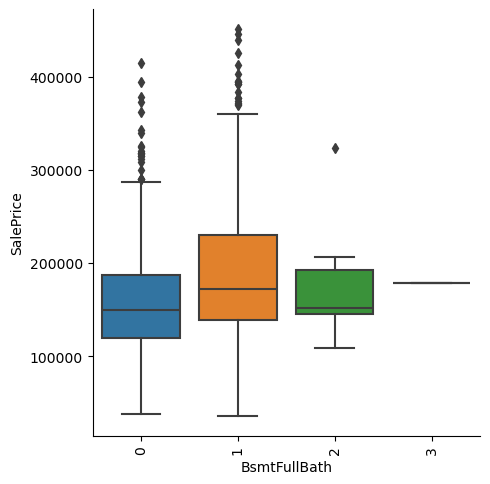

In [68]:
df_housing.BsmtFullBath = df_housing.BsmtFullBath.astype(int)
plot_concat_var(df_housing, column_name='BsmtFullBath', target='SalePrice' )#,hue='YrSold'

#### BsmtHalfBath:
Basement half bathrooms

Null values in BsmtHalfBath : 0


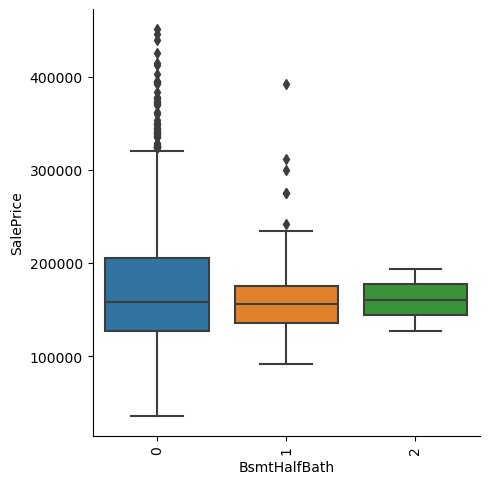

In [69]:
df_housing.BsmtHalfBath = df_housing.BsmtHalfBath.astype(int)
plot_concat_var(df_housing, column_name='BsmtHalfBath', target='SalePrice' )#,hue='YrSold'

#### FullBath: 
Full bathrooms above grade

Null values in FullBath : 0


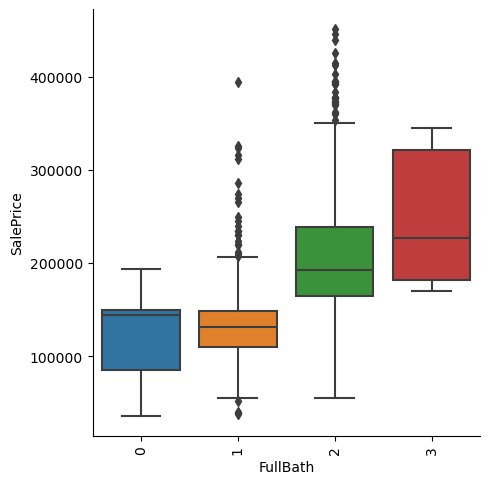

In [70]:
df_housing.FullBath = df_housing.FullBath.astype(int)
plot_concat_var(df_housing, column_name='FullBath', target='SalePrice' )#,hue='YrSold'

#### HalfBath:
Half baths above grade

Null values in HalfBath : 0


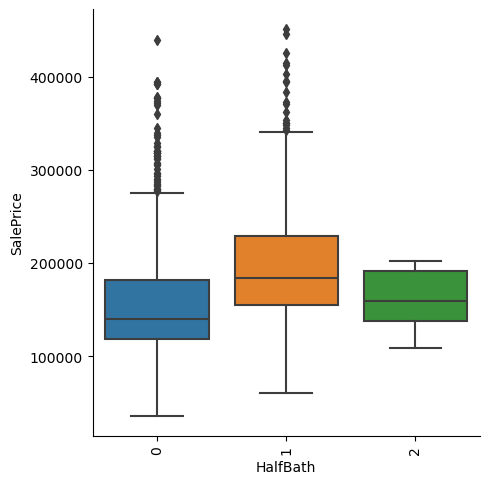

In [71]:
df_housing.HalfBath = df_housing.HalfBath.astype(int)
plot_concat_var(df_housing, column_name='HalfBath', target='SalePrice' )#,hue='YrSold'

#### Bedroom(BedroomAbvGr):
Bedrooms above grade (does NOT include basement bedrooms)
Input dataframe has no column named as 'Bedroom'(in data dictionary) so we are considering 'BedroomAbvGr' for analysis.

Null values in BedroomAbvGr : 0


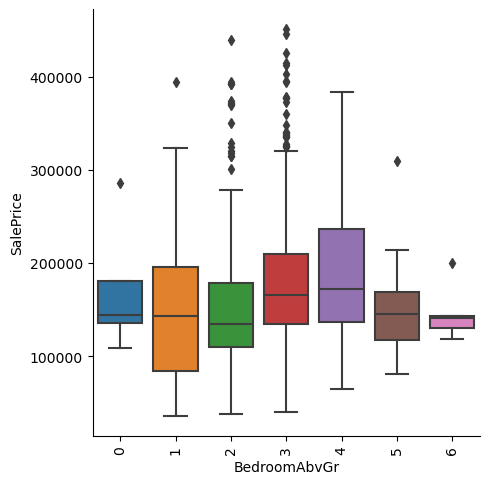

In [72]:
df_housing.BedroomAbvGr = df_housing.BedroomAbvGr.astype(int)
plot_concat_var(df_housing, column_name='BedroomAbvGr', target='SalePrice' )#,hue='YrSold'

#### Kitchen(KitchenAbvGr): 
Kitchens above grade
Input dataframe has no column named as 'Kitchen'(in data dictionary) so we are considering 'KitchenAbvGr' for analysis.

Null values in KitchenAbvGr : 0


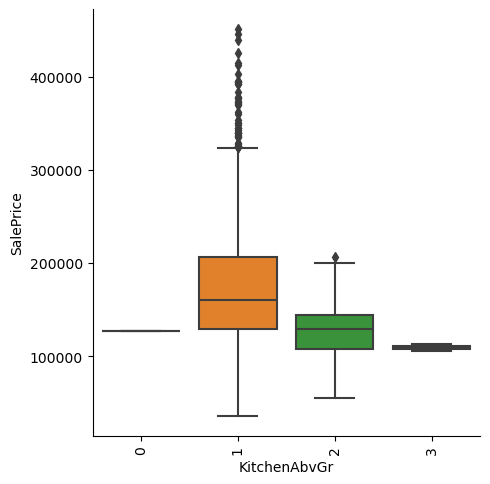

In [73]:
df_housing.KitchenAbvGr = df_housing.KitchenAbvGr.astype(int)
plot_concat_var(df_housing, column_name='KitchenAbvGr', target='SalePrice' )#,hue='YrSold'

#### KitchenQual:
Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

Null values in KitchenQual : 0


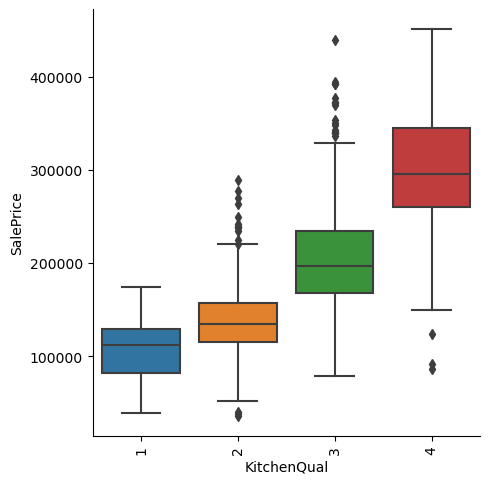

In [74]:
# Map KitchenQual values to ordered integers as follows
df_housing.KitchenQual = df_housing.KitchenQual.map({'Ex':4,
                                                 'Gd':3,
                                                 'TA':2,
                                                 'Fa':1,
                                                 'Po':0
                                                })

df_housing.KitchenQual = df_housing.KitchenQual.astype(int)
plot_concat_var(df_housing, column_name='KitchenQual', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between Kitchen quality and target variable.

#### Functional:
Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Null values in Functional : 0


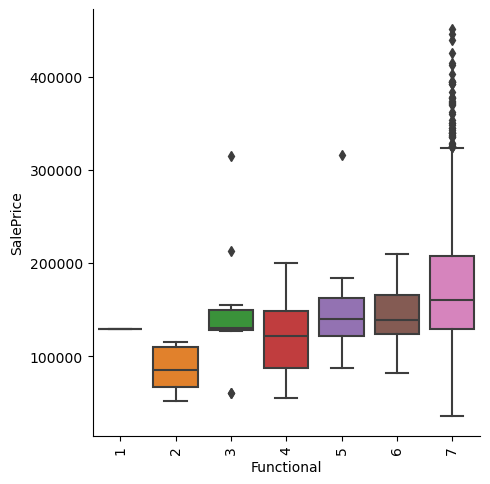

In [75]:
# Map Functional values to ordered integers as follows
df_housing.Functional = df_housing.Functional.map({'Typ':7,
                                                   'Min1':6,
                                                   'Min2':5,
                                                   'Mod':4,
                                                   'Maj1':3,
                                                   'Maj2':2,
                                                   'Sev':1,
                                                   'Sal':0
                                                })

df_housing.Functional = df_housing.Functional.astype(int)
plot_concat_var(df_housing, column_name='Functional', target='SalePrice' )#,hue='YrSold'

#### Fireplaces: 
Number of fireplaces

Null values in Fireplaces : 0


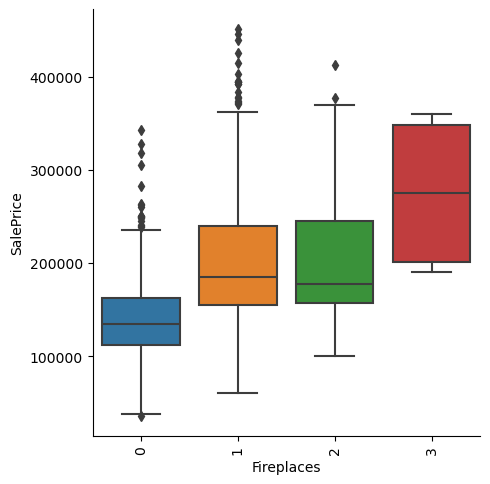

In [76]:
df_housing.Fireplaces = df_housing.Fireplaces.astype(int)
plot_concat_var(df_housing, column_name='Fireplaces', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between Number of fireplaces and target variable.

#### FireplaceQu: 
Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

Null values in FireplaceQu : 0


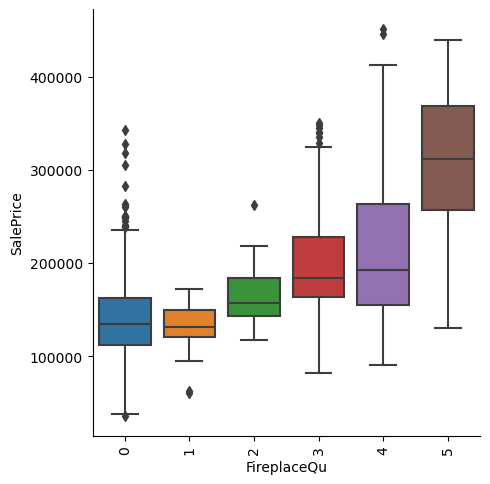

In [77]:
# Map FireplaceQu values to ordered integers as follows
df_housing.FireplaceQu = df_housing.FireplaceQu.fillna('No_fireplace')
df_housing.FireplaceQu = df_housing.FireplaceQu.map({'Ex': 5,
                                                 'Gd':4,
                                                 'TA':3,
                                                 'Fa':2,
                                                 'Po':1,
                                                 'No_fireplace':0
                                                })

df_housing.FireplaceQu = df_housing.FireplaceQu.astype(int)
plot_concat_var(df_housing, column_name='FireplaceQu', target='SalePrice' )#,hue='YrSold'

#### GarageYrBlt: 
Year garage was built

Null values in GarageYrBlt:  77
Null values in GarageYrBlt : 0


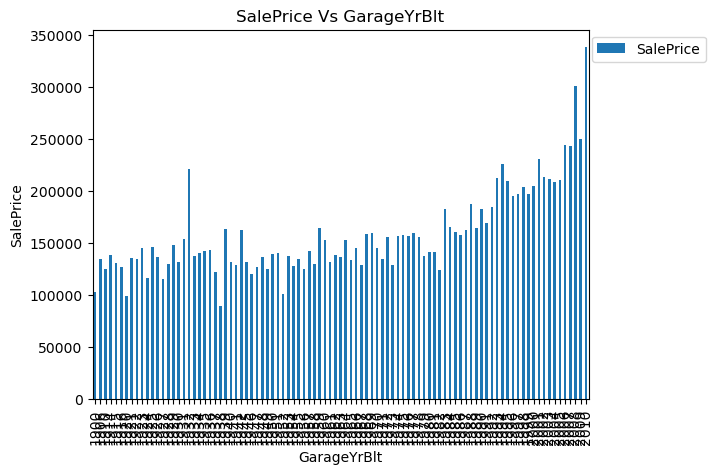

In [78]:
print("Null values in GarageYrBlt: ",df_housing.GarageYrBlt.isna().sum())
# Filling null rows with minimum year value
df_housing.GarageYrBlt = df_housing.GarageYrBlt.fillna(df_housing.GarageYrBlt.min())
df_housing.GarageYrBlt = df_housing.GarageYrBlt.astype(int)
plot_concat_var(df_housing, column_name='GarageYrBlt', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

#### GarageFinish: 
Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Null values in GarageFinish : 0


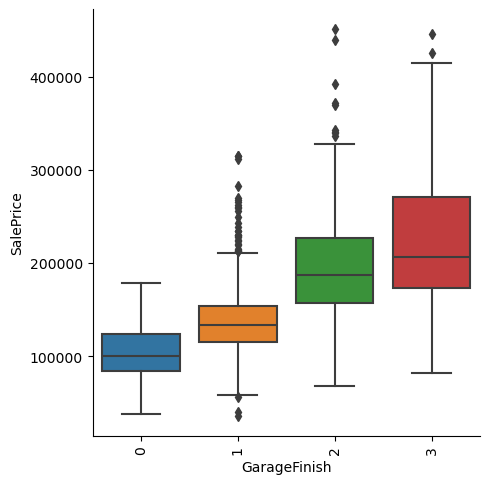

In [79]:
# Map GarageFinish values to ordered integers as follows
df_housing.GarageFinish = df_housing.GarageFinish.fillna('No_Garage')
df_housing.GarageFinish = df_housing.GarageFinish.map({
                                                 'Fin':3,
                                                 'RFn':2,
                                                 'Unf':1,
                                                 'No_Garage':0
                                                })

df_housing.GarageFinish = df_housing.GarageFinish.astype(int)
plot_concat_var(df_housing, column_name='GarageFinish', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between Interior finish of the garage and target variable.

#### GarageCars: 
Size of garage in car capacity

Null values in GarageCars : 0


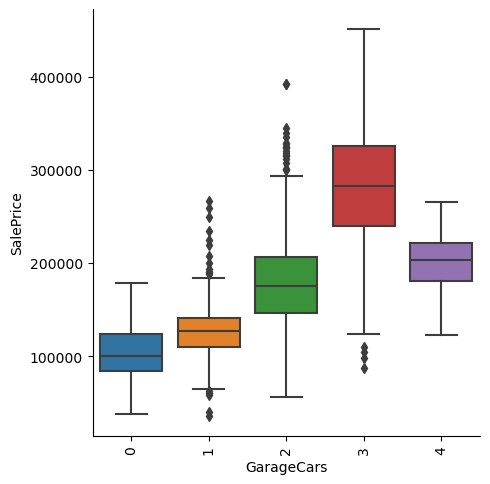

In [80]:
df_housing.GarageCars = df_housing.GarageCars.astype(int)
plot_concat_var(df_housing, column_name='GarageCars', target='SalePrice' )#,hue='YrSold'

#### GarageQual:
Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Null values in GarageQual : 0


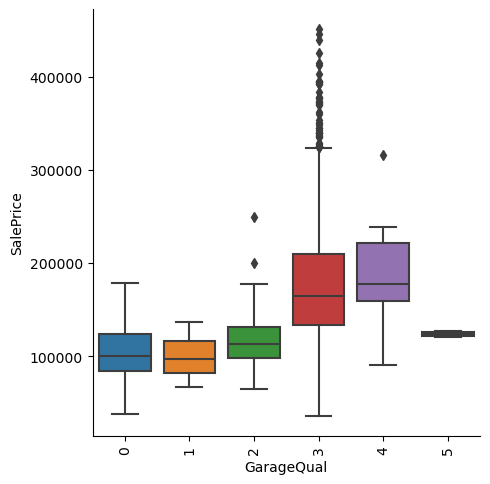

In [81]:
# Map GarageQual values to ordered integers as follows
df_housing.GarageQual = df_housing.GarageQual.fillna('No_Garage')
df_housing.GarageQual = df_housing.GarageQual.map({'Ex':5,
                                                       'Gd':4,
                                                       'TA':3,
                                                       'Fa':2,
                                                       'Po':1,
                                                       'No_Garage':0
                                                      })

df_housing.GarageQual = df_housing.GarageQual.astype(int)
plot_concat_var(df_housing, column_name='GarageQual', target='SalePrice' )#,hue='YrSold'

#### GarageCond: 
Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Null values in GarageCond : 0


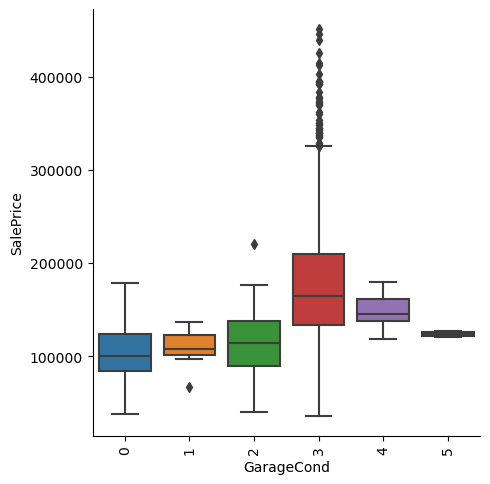

In [82]:
# Map GarageCond values to ordered integers as follows
df_housing.GarageCond = df_housing.GarageCond.fillna('No_Garage')
df_housing.GarageCond = df_housing.GarageCond.map({'Ex':5,
                                                       'Gd':4,
                                                       'TA':3,
                                                       'Fa':2,
                                                       'Po':1,
                                                       'No_Garage':0
                                                      })

df_housing.GarageCond = df_housing.GarageCond.astype(int)
plot_concat_var(df_housing, column_name='GarageCond', target='SalePrice' )#,hue='YrSold'

### PavedDrive: 
Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

Null values in PavedDrive : 0


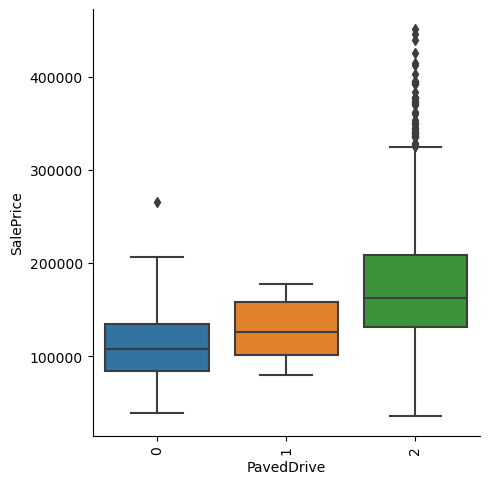

In [83]:
# Map PavedDrive values to ordered integers as follows
df_housing.PavedDrive = df_housing.PavedDrive.map({'Y':2,
                                                   'P':1,
                                                   'N':0
                                                  })

df_housing.PavedDrive = df_housing.PavedDrive.astype(int)
plot_concat_var(df_housing, column_name='PavedDrive', target='SalePrice' )#,hue='YrSold'

#### MoSold:
Month Sold (MM)


Null values in MoSold : 0


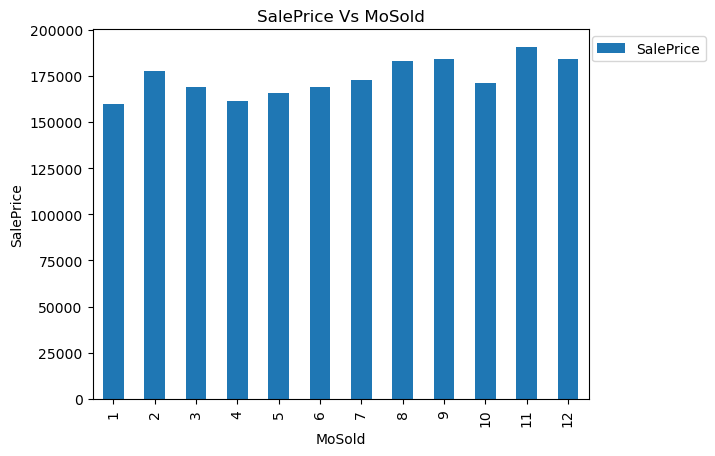

In [84]:
df_housing.MoSold = df_housing.MoSold.astype(int)
plot_concat_var(df_housing, column_name='MoSold', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

In [85]:
# There is not much correlation between MoSold and target variable so we can drop MoSold column from analysis.
df_housing = df_housing.drop('MoSold', axis=1)

#### YrSold: 
Year Sold (YYYY)

Null values in YrSold : 0


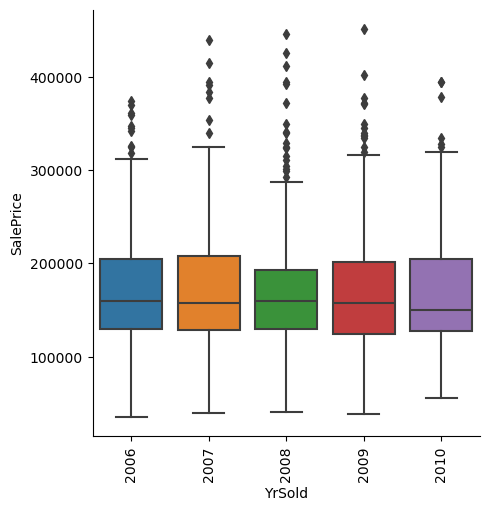

In [86]:
df_housing.YrSold = df_housing.YrSold.astype(int)
plot_concat_var(df_housing, column_name='YrSold', target='SalePrice' )#,hue='YrSold'

In [87]:
# There is not much correlation between YrSold and target variable so we can drop YrSold column from analysis.
df_housing = df_housing.drop('YrSold', axis=1)

#### Utilities: 
Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

This variable is an ordered catagorical varible

Null values in Utilities : 0


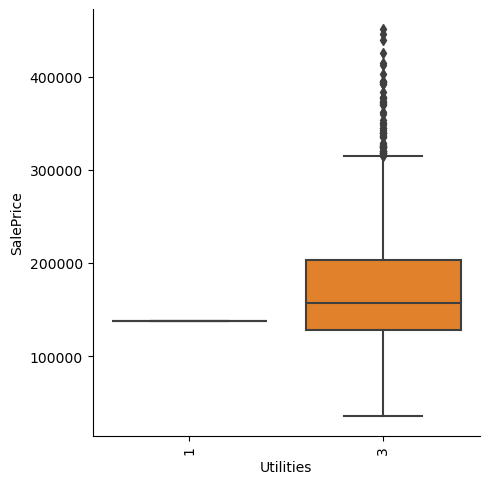

In [88]:
# Map PavedDrive values to ordered integers as follows
df_housing.Utilities = df_housing.Utilities.map({'AllPub':3,
                                                 'NoSewr':2,
                                                 'NoSeWa':1,
                                                 'ELO':0
                                                  })

df_housing.Utilities = df_housing.Utilities.astype(int)
plot_concat_var(df_housing, column_name='Utilities', target='SalePrice' )#,hue='YrSold'

In [89]:
# There are no values present for catagory 0,1,2 so we can drop this column
df_housing = df_housing.drop('Utilities', axis=1)

#### LandSlope: 
Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

Null values in LandSlope : 0


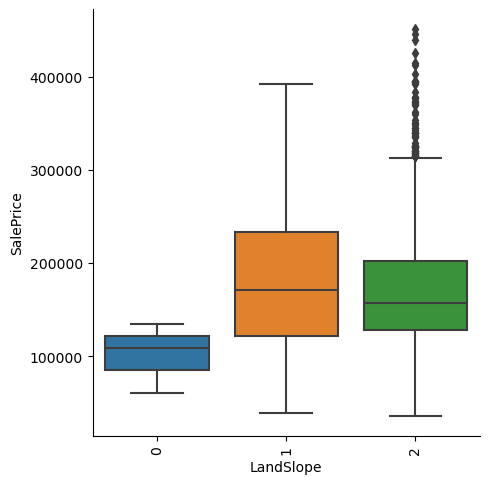

In [90]:
# Map LandSlope values to ordered integers as follows
df_housing.LandSlope = df_housing.LandSlope.map({'Gtl':2,
                                                 'Mod':1,
                                                 'Sev':0
                                                  })

df_housing.LandSlope = df_housing.LandSlope.astype(int)
plot_concat_var(df_housing, column_name='LandSlope', target='SalePrice' )#,hue='YrSold'

#### Electrical:
Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [91]:
print("Null values: ",df_housing.Electrical.isna().sum())
set(df_housing.Electrical)

Null values:  1


{'FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr', nan}

Null values in Electrical : 0


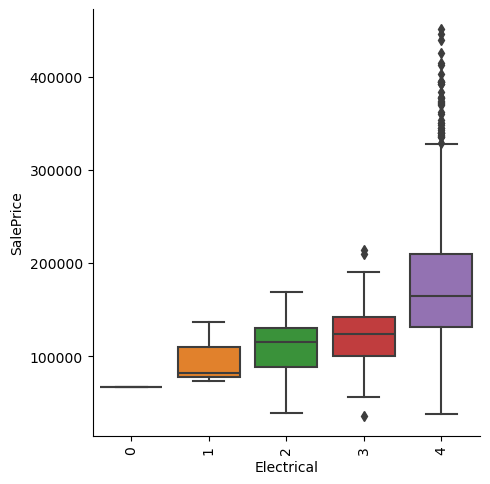

In [92]:

# Drop null row
df_housing = df_housing[~df_housing.Electrical.isna()]
# Map Electrical values to ordered integers as follows
df_housing.Electrical = df_housing.Electrical.map({'SBrkr':4,
                                                   'FuseA':3,
                                                   'FuseF':2,
                                                   'FuseP':1,
                                                   'Mix':0
                                                  })
df_housing.Electrical = df_housing.Electrical.astype(int)
plot_concat_var(df_housing, column_name='Electrical', target='SalePrice' )#,hue='YrSold'

From the plot we can observe that there is a clear correlation between Electrical system and target variable.

#### TotRmsAbvGrd: 
Total rooms above grade (does not include bathrooms)

In [93]:
df_housing.TotRmsAbvGrd = df_housing.TotRmsAbvGrd.astype(int)
plot_concat_var(df_housing, column_name='TotRmsAbvGrd', target='SalePrice' )#,hue='YrSold'

Null values in TotRmsAbvGrd : 0


#### BldgType: 
Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

There is a charector missmatch between data dictionary and data file for this column.

In [94]:
set(df_housing.BldgType)

{'1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'}

In [95]:

# Map BldgType values to ordered integers as follows
df_housing.BldgType = df_housing.BldgType.map({'Twnhs':4,
                                                   'TwnhsE':3,
                                                   'Duplex':2,
                                                   '2fmCon':1,
                                                   '1Fam':0
                                                  })
df_housing.BldgType = df_housing.BldgType.astype(int)
plot_concat_var(df_housing, column_name='BldgType', target='SalePrice' )#,hue='YrSold'

Null values in BldgType : 0


#### HouseStyle:
Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [96]:
set(df_housing.HouseStyle)

{'1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl'}

Null values in HouseStyle : 0


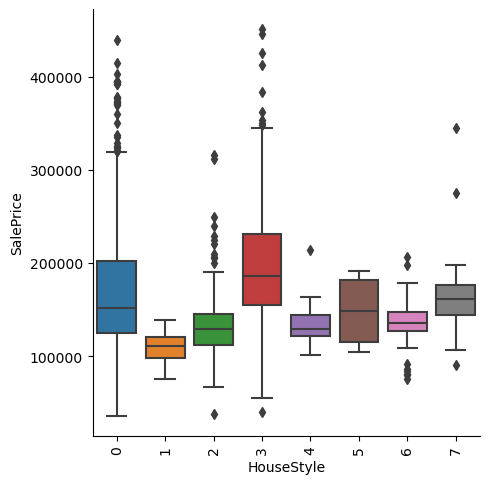

In [97]:

# Map HouseStyle values to ordered integers as follows
df_housing.HouseStyle = df_housing.HouseStyle.map({'SLvl':7,
                                                   'SFoyer':6,
                                                   '2.5Fin':5,
                                                   '2.5Unf':4,
                                                   '2Story':3,
                                                   '1.5Fin':2,
                                                   '1.5Unf':1,
                                                   '1Story':0
                                                  })
df_housing.HouseStyle = df_housing.HouseStyle.astype(int)
plot_concat_var(df_housing, column_name='HouseStyle', target='SalePrice' )#,hue='YrSold'

#### LotConfig: 
Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

This variable is an un-ordered catagorical variable

In [98]:
set(df_housing.LotConfig)

{'Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'}

In [99]:
df_housing.LotConfig = df_housing.LotConfig.map({'Inside':4, 
                                                 'Corner':3,
                                                 'CulDSac':2,
                                                 'FR2':1,
                                                 'FR3':0,
                                                })
df_housing.LotConfig = df_housing.LotConfig.astype(int)
plot_concat_var(df_housing, column_name='LotConfig', target='SalePrice' )#,hue='YrSold'

Null values in LotConfig : 0


### Univariate analysis on catagorical variables:

#### MSSubClass: 
Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
And there is no null value prese, This variable is catagorical value.nt in this column

Null values in MSSubClass : 0


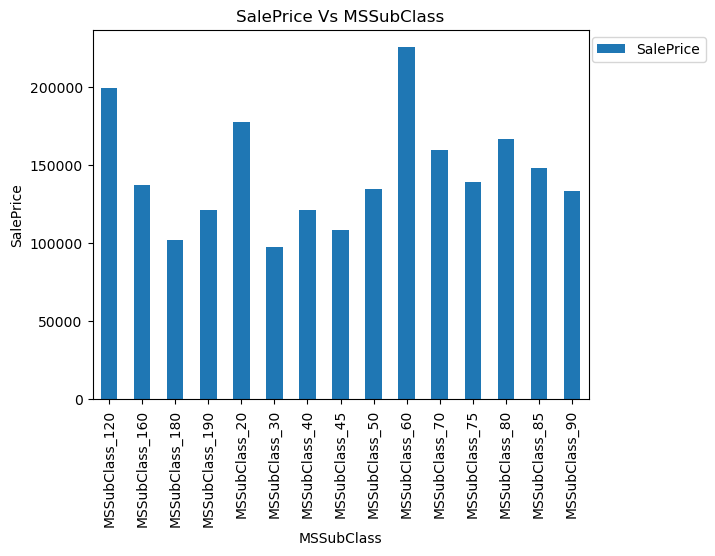

In [100]:
df_housing.MSSubClass = df_housing.MSSubClass.map({20:'MSSubClass_20',
                                                   30:'MSSubClass_30',
                                                   40:'MSSubClass_40',
                                                   45:'MSSubClass_45',
                                                   50:'MSSubClass_50',
                                                   60:'MSSubClass_60',
                                                   70:'MSSubClass_70',
                                                   75:'MSSubClass_75',
                                                   80:'MSSubClass_80',
                                                   85:'MSSubClass_85',
                                                   90:'MSSubClass_90',
                                                   120:'MSSubClass_120',
                                                   150:'MSSubClass_150',
                                                   160:'MSSubClass_160',
                                                   180:'MSSubClass_180',
                                                   190:'MSSubClass_190'
                                          })
plot_concat_var(df_housing, column_name='MSSubClass', target='SalePrice' , plot_type='Bar')#,hue='YrSold'

In [101]:
df_housing = make_dummys(df_housing, 'MSSubClass')
df_housing.head()

MSZoning  LotFrontage  LotArea Street  Alley  LotShape LandContour  \
0       RL         65.0     8450   Pave      0         3         Lvl   
1       RL         80.0     9600   Pave      0         3         Lvl   
2       RL         68.0    11250   Pave      0         2         Lvl   
3       RL         60.0     9550   Pave      0         2         Lvl   
4       RL         84.0    14260   Pave      0         2         Lvl   

   LotConfig  LandSlope Neighborhood  ... MSSubClass_30 MSSubClass_40  \
0          4          2      CollgCr  ...             0             0   
1          1          2      Veenker  ...             0             0   
2          4          2      CollgCr  ...             0             0   
3          3          2      Crawfor  ...             0             0   
4          1          2      NoRidge  ...             0             0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80 MSSubClass_85 MSSubClass_90  
0              0             0             0  
1              0             0             0  
2              0             0             0  
3              0             0             0  
4              0             0             0  

[5 rows x 82 columns]

#### MSZoning: 
Identifies the general zoning classification of the sale.<br>
- A &emsp; Agriculture<br>
- C&emsp;Commercial<br>
- FV&emsp;Floating Village Residential<br>
- I&emsp;Industrial<br>
- RH&emsp;Residential High Density<br>
- RL&emsp;Residential Low Density<br>
- RP&emsp;Residential Low Density Park<br> 
- RM&emsp;Residential Medium Density<br>

There are no null values present in this column

Null values in MSZoning : 8


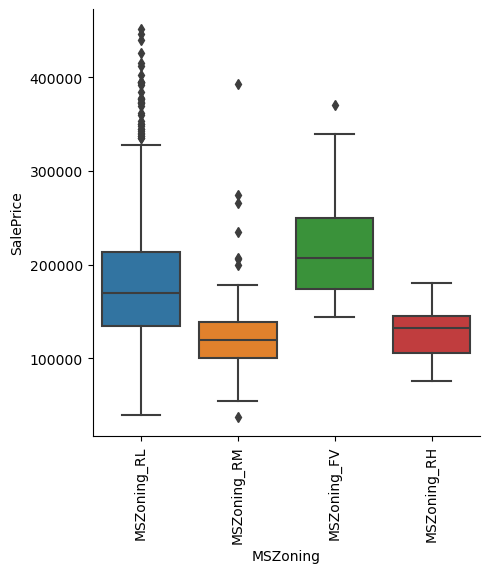

In [102]:
df_housing.MSZoning = df_housing.MSZoning.map({'A':'MSZoning_A', 
                                           'C':'MSZoning_C', 
                                           'FV':'MSZoning_FV',
                                           'I':'MSZoning_I',
                                           'RH': 'MSZoning_RH',
                                           'RL': 'MSZoning_RL',
                                           'RP': 'MSZoning_RP',
                                           'RM': 'MSZoning_RM'
                                          })
plot_concat_var(df_housing, column_name='MSZoning', target='SalePrice' )#,hue='YrSold'

As per observation from plot Floating Village Residential houses sold for higher prices compared with other catagories.
Also there are only 4 catagories in 'MSZoning' column
This column contains independent catagorical values so we can make dummy variables from this column as follows.

In [103]:
df_housing = make_dummys(df_housing, 'MSZoning')
df_housing.head()

LotFrontage  LotArea Street  Alley  LotShape LandContour  LotConfig  \
0         65.0     8450   Pave      0         3         Lvl          4   
1         80.0     9600   Pave      0         3         Lvl          1   
2         68.0    11250   Pave      0         2         Lvl          4   
3         60.0     9550   Pave      0         2         Lvl          3   
4         84.0    14260   Pave      0         2         Lvl          1   

   LandSlope Neighborhood Condition1  ... MSSubClass_50  MSSubClass_60  \
0          2      CollgCr       Norm  ...             0              1   
1          2      Veenker      Feedr  ...             0              0   
2          2      CollgCr       Norm  ...             0              1   
3          2      Crawfor       Norm  ...             0              0   
4          2      NoRidge       Norm  ...             0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

  MSZoning_RH MSZoning_RL MSZoning_RM  
0           0           1           0  
1           0           1           0  
2           0           1           0  
3           0           1           0  
4           0           1           0  

[5 rows x 84 columns]

#### Street:
Type of road access to property<br>
- Grvl &emsp; Gravel <br>
-  Pav &emsp; 	Paved

Null values in Street : 0


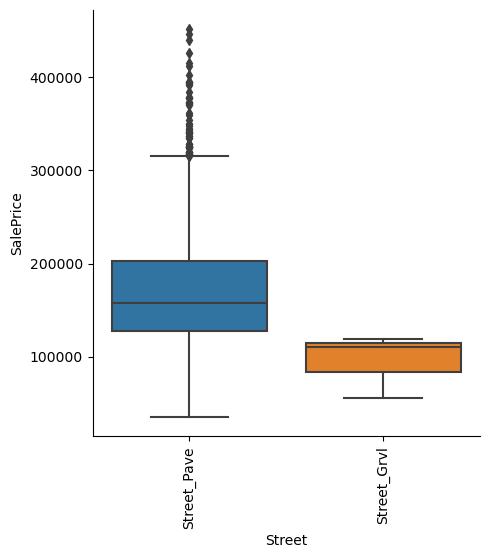

In [104]:
df_housing.Street = df_housing.Street.map({'Grvl':'Street_Grvl', 
                                           'Pave':'Street_Pave', 
                                          })
plot_concat_var(df_housing, column_name='Street', target='SalePrice' )#,hue='YrSold'

As per observaion from plot Street, more number of sales happend on Paved properties with high price compared with gravel lands.
We will make dummy variables from this columns as follows.

In [105]:
df_housing = make_dummys(df_housing, 'Street')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape LandContour  LotConfig  LandSlope  \
0         65.0     8450      0         3         Lvl          4          2   
1         80.0     9600      0         3         Lvl          1          2   
2         68.0    11250      0         2         Lvl          4          2   
3         60.0     9550      0         2         Lvl          3          2   
4         84.0    14260      0         2         Lvl          1          2   

  Neighborhood Condition1 Condition2  ...  MSSubClass_60  MSSubClass_70  \
0      CollgCr       Norm       Norm  ...              1              0   
1      Veenker      Feedr       Norm  ...              0              0   
2      CollgCr       Norm       Norm  ...              1              0   
3      Crawfor       Norm       Norm  ...              0              1   
4      NoRidge       Norm       Norm  ...              1              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90 MSZoning_RH  \
0              0              0              0              0           0   
1              0              0              0              0           0   
2              0              0              0              0           0   
3              0              0              0              0           0   
4              0              0              0              0           0   

  MSZoning_RL MSZoning_RM Street_Pave  
0           1           0           1  
1           1           0           1  
2           1           0           1  
3           1           0           1  
4           1           0           1  

[5 rows x 84 columns]

#### LandContour:
Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

This variable is an un-ordered catagorical variable so we can make dummy variables from this column.

In [106]:
df_housing.LandContour = df_housing.LandContour.map({'Lvl':'LandContour_Lvl', 
                                           'Bnk':'LandContour_Bnk', 
                                           'HLS':'LandContour_HLS', 
                                           'Low':'LandContour_Low', 
                                          })
plot_concat_var(df_housing, column_name='LandContour', target='SalePrice' )#,hue='YrSold'

Null values in LandContour : 0


In [107]:
df_housing = make_dummys(df_housing, 'LandContour')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope Neighborhood  \
0         65.0     8450      0         3          4          2      CollgCr   
1         80.0     9600      0         3          1          2      Veenker   
2         68.0    11250      0         2          4          2      CollgCr   
3         60.0     9550      0         2          3          2      Crawfor   
4         84.0    14260      0         2          1          2      NoRidge   

  Condition1 Condition2  BldgType  ...  MSSubClass_80  MSSubClass_85  \
0       Norm       Norm         0  ...              0              0   
1      Feedr       Norm         0  ...              0              0   
2       Norm       Norm         0  ...              0              0   
3       Norm       Norm         0  ...              0              0   
4       Norm       Norm         0  ...              0              0   

   MSSubClass_90  MSZoning_RH  MSZoning_RL MSZoning_RM Street_Pave  \
0              0            0            1           0           1   
1              0            0            1           0           1   
2              0            0            1           0           1   
3              0            0            1           0           1   
4              0            0            1           0           1   

  LandContour_HLS LandContour_Low LandContour_Lvl  
0               0               0               1  
1               0               0               1  
2               0               0               1  
3               0               0               1  
4               0               0               1  

[5 rows x 86 columns]

#### Neighborhood: 
Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [108]:
# Appending variable name with value
df_housing.Neighborhood = df_housing.Neighborhood.apply(lambda x:'Neighborhood_'+x)
plot_concat_var(df_housing, column_name='Neighborhood', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

Null values in Neighborhood : 0


In [109]:
df_housing = make_dummys(df_housing, 'Neighborhood')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope Condition1  \
0         65.0     8450      0         3          4          2       Norm   
1         80.0     9600      0         3          1          2      Feedr   
2         68.0    11250      0         2          4          2       Norm   
3         60.0     9550      0         2          3          2       Norm   
4         84.0    14260      0         2          1          2       Norm   

  Condition2  BldgType  HouseStyle  ...  Neighborhood_NoRidge  \
0       Norm         0           3  ...                     0   
1       Norm         0           0  ...                     0   
2       Norm         0           3  ...                     0   
3       Norm         0           3  ...                     0   
4       Norm         0           3  ...                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

  Neighborhood_Sawyer Neighborhood_SawyerW Neighborhood_Somerst  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

  Neighborhood_StoneBr Neighborhood_Timber  Neighborhood_Veenker  
0                    0                   0                     0  
1                    0                   0                     1  
2                    0                   0                     0  
3                    0                   0                     0  
4                    0                   0                     0  

[5 rows x 109 columns]

#### Condition1: 
Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

I am not sure about this column whether it fall in to ordered catagorical or not, So we are making dummy variables from this column.

Null values in Condition1 : 0


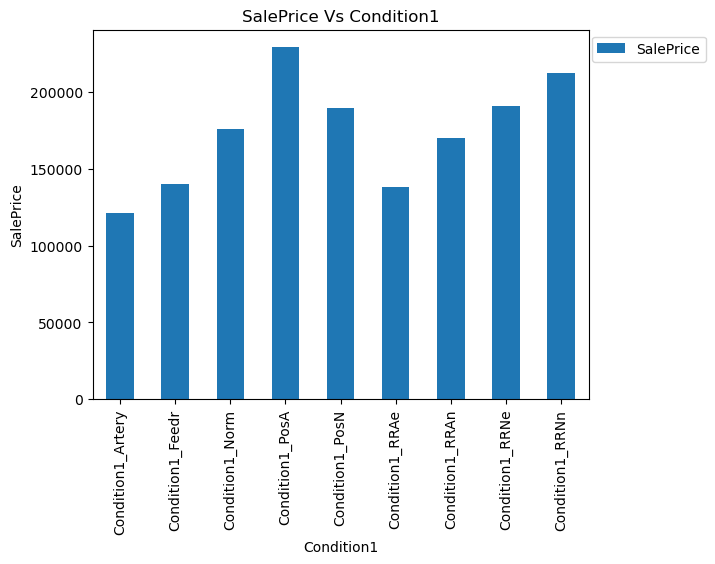

In [110]:
# Appending variable name with value
df_housing.Condition1 = df_housing.Condition1.apply(lambda x:'Condition1_'+x)
plot_concat_var(df_housing, column_name='Condition1', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

In [111]:
df_housing = make_dummys(df_housing, 'Condition1')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope Condition2  \
0         65.0     8450      0         3          4          2       Norm   
1         80.0     9600      0         3          1          2       Norm   
2         68.0    11250      0         2          4          2       Norm   
3         60.0     9550      0         2          3          2       Norm   
4         84.0    14260      0         2          1          2       Norm   

   BldgType  HouseStyle  OverallQual  ...  Neighborhood_Timber  \
0         0           3            7  ...                    0   
1         0           0            6  ...                    0   
2         0           3            7  ...                    0   
3         0           3            7  ...                    0   
4         0           3            8  ...                    0   

   Neighborhood_Veenker  Condition1_Feedr Condition1_Norm Condition1_PosA  \
0                     0                 0               1               0   
1                     1                 1               0               0   
2                     0                 0               1               0   
3                     0                 0               1               0   
4                     0                 0               1               0   

  Condition1_PosN Condition1_RRAe Condition1_RRAn  Condition1_RRNe  \
0               0               0               0                0   
1               0               0               0                0   
2               0               0               0                0   
3               0               0               0                0   
4               0               0               0                0   

   Condition1_RRNn  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 116 columns]

#### Condition2: 
Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad


Null values in Condition2 : 0


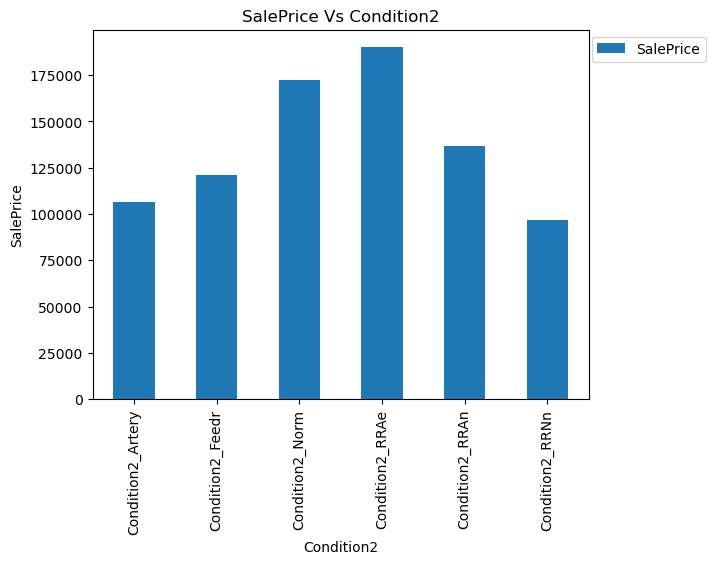

In [112]:
# Appending variable name with value
df_housing.Condition2 = df_housing.Condition2.apply(lambda x:'Condition2_'+x)
plot_concat_var(df_housing, column_name='Condition2', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

In [113]:
df_housing = make_dummys(df_housing, 'Condition2')
df_housing.head()
#df_housing = df_housing.drop('Condition2', axis=1)

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope  BldgType  \
0         65.0     8450      0         3          4          2         0   
1         80.0     9600      0         3          1          2         0   
2         68.0    11250      0         2          4          2         0   
3         60.0     9550      0         2          3          2         0   
4         84.0    14260      0         2          1          2         0   

   HouseStyle  OverallQual  OverallCond  ...  Condition1_PosN  \
0           3            7            5  ...                0   
1           0            6            8  ...                0   
2           3            7            5  ...                0   
3           3            7            5  ...                0   
4           3            8            5  ...                0   

   Condition1_RRAe Condition1_RRAn Condition1_RRNe Condition1_RRNn  \
0                0               0               0               0   
1                0               0               0               0   
2                0               0               0               0   
3                0               0               0               0   
4                0               0               0               0   

  Condition2_Feedr Condition2_Norm  Condition2_RRAe  Condition2_RRAn  \
0                0               1                0                0   
1                0               1                0                0   
2                0               1                0                0   
3                0               1                0                0   
4                0               1                0                0   

   Condition2_RRNn  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 120 columns]

#### RoofStyle:
Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

Null values in RoofStyle : 0


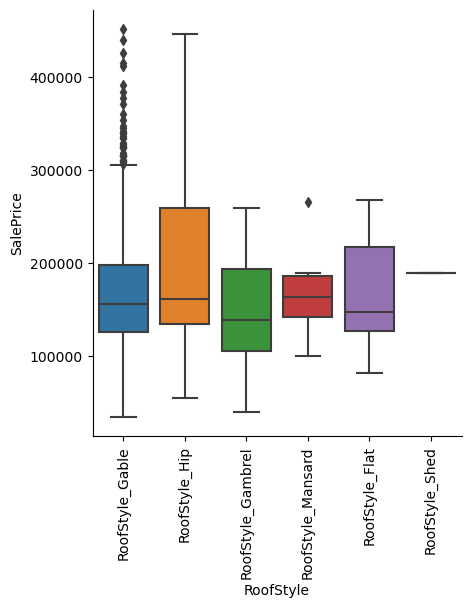

In [114]:
# Appending variable name with value
df_housing.RoofStyle = df_housing.RoofStyle.apply(lambda x:'RoofStyle_'+x)
plot_concat_var(df_housing, column_name='RoofStyle', target='SalePrice' )#,hue='YrSold'

There is no variation in catagory RoofStyle_Shed and there is not much correlation with target variable so we can drop this column

In [115]:
df_housing = df_housing.drop('RoofStyle', axis=1)

#### RoofMatl:
Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Null values in RoofMatl : 0


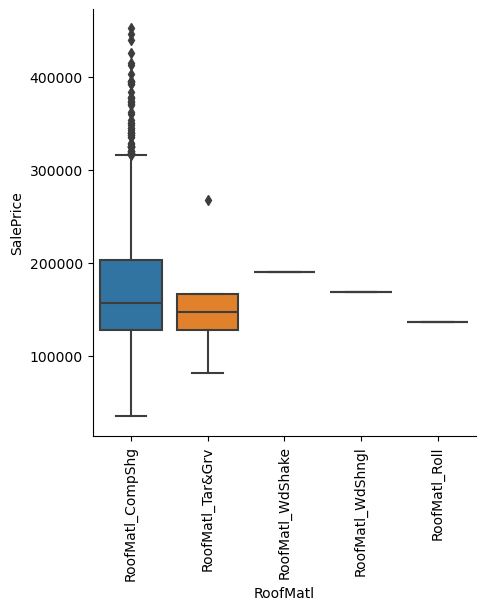

In [116]:
# Appending variable name with value
df_housing.RoofMatl = df_housing.RoofMatl.apply(lambda x:'RoofMatl_'+x)
plot_concat_var(df_housing, column_name='RoofMatl', target='SalePrice' )#,hue='YrSold'

In [117]:
#df_housing = make_dummys(df_housing, 'RoofMatl')
#df_housing.head()
# There is no balance in categories so we can drop this column 
df_housing = df_housing.drop('RoofMatl', axis=1)

#### Exterior1st:
Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Null values in Exterior1st : 0


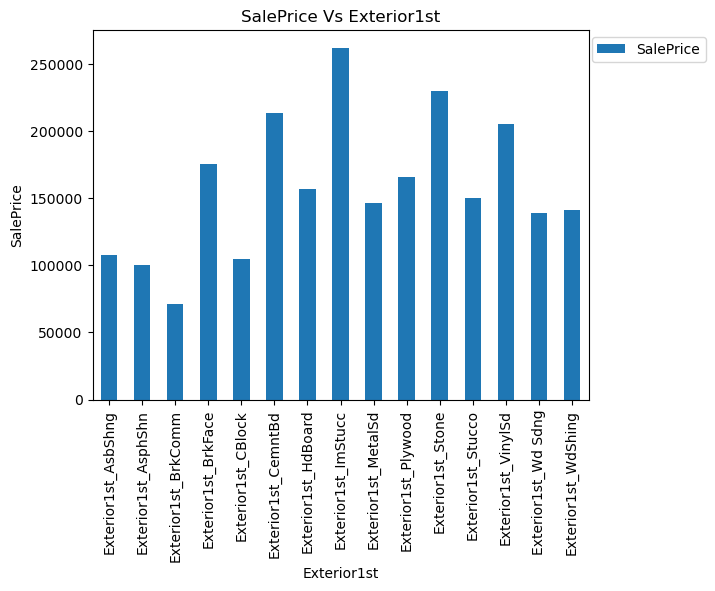

In [118]:
# Appending variable name with value
df_housing.Exterior1st = df_housing.Exterior1st.apply(lambda x:'Exterior1st_'+x)
plot_concat_var(df_housing, column_name='Exterior1st', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

In [119]:
df_housing = make_dummys(df_housing, 'Exterior1st')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope  BldgType  \
0         65.0     8450      0         3          4          2         0   
1         80.0     9600      0         3          1          2         0   
2         68.0    11250      0         2          4          2         0   
3         60.0     9550      0         2          3          2         0   
4         84.0    14260      0         2          1          2         0   

   HouseStyle  OverallQual  OverallCond  ...  Exterior1st_CemntBd  \
0           3            7            5  ...                    0   
1           0            6            8  ...                    0   
2           3            7            5  ...                    0   
3           3            7            5  ...                    0   
4           3            8            5  ...                    0   

   Exterior1st_HdBoard Exterior1st_ImStucc Exterior1st_MetalSd  \
0                    0                   0                   0   
1                    0                   0                   1   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   

   Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  \
0                    0                  0                   0   
1                    0                  0                   0   
2                    0                  0                   0   
3                    0                  0                   0   
4                    0                  0                   0   

  Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  
0                   1                    0                    0  
1                   0                    0                    0  
2                   1                    0                    0  
3                   0                    1                    0  
4                   1                    0                    0  

[5 rows x 131 columns]

#### Exterior2nd: 
Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [120]:
# Appending variable name with value
df_housing.Exterior2nd = df_housing.Exterior2nd.apply(lambda x:'Exterior2nd_'+x)
plot_concat_var(df_housing, column_name='Exterior2nd', target='SalePrice', plot_type='Bar' )#,hue='YrSold'

Null values in Exterior2nd : 0


In [121]:
df_housing = make_dummys(df_housing, 'Exterior2nd')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope  BldgType  \
0         65.0     8450      0         3          4          2         0   
1         80.0     9600      0         3          1          2         0   
2         68.0    11250      0         2          4          2         0   
3         60.0     9550      0         2          3          2         0   
4         84.0    14260      0         2          1          2         0   

   HouseStyle  OverallQual  OverallCond  ...  Exterior2nd_HdBoard  \
0           3            7            5  ...                    0   
1           0            6            8  ...                    0   
2           3            7            5  ...                    0   
3           3            7            5  ...                    0   
4           3            8            5  ...                    0   

   Exterior2nd_ImStucc Exterior2nd_MetalSd  Exterior2nd_Other  \
0                    0                   0                  0   
1                    0                   1                  0   
2                    0                   0                  0   
3                    0                   0                  0   
4                    0                   0                  0   

   Exterior2nd_Plywood  Exterior2nd_Stone Exterior2nd_Stucco  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   

   Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  
0                    1                    0                    0  
1                    0                    0                    0  
2                    1                    0                    0  
3                    0                    0                    1  
4                    1                    0                    0  

[5 rows x 145 columns]

#### Foundation: 
Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

Null values in Foundation : 0


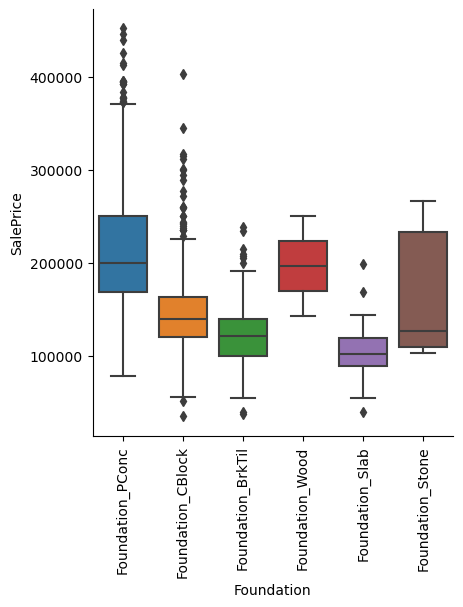

In [122]:
# Map MasVnrType values to ordered integers as follows
#df_housing.Foundation = df_housing.Foundation.fillna('No')
df_housing.Foundation = df_housing.Foundation.apply(lambda x:'Foundation_'+x)
plot_concat_var(df_housing, column_name='Foundation', target='SalePrice' )#,hue='YrSold'


In [123]:
df_housing = make_dummys(df_housing, 'Foundation')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope  BldgType  \
0         65.0     8450      0         3          4          2         0   
1         80.0     9600      0         3          1          2         0   
2         68.0    11250      0         2          4          2         0   
3         60.0     9550      0         2          3          2         0   
4         84.0    14260      0         2          1          2         0   

   HouseStyle  OverallQual  OverallCond  ...  Exterior2nd_Stone  \
0           3            7            5  ...                  0   
1           0            6            8  ...                  0   
2           3            7            5  ...                  0   
3           3            7            5  ...                  0   
4           3            8            5  ...                  0   

   Exterior2nd_Stucco Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  \
0                   0                   1                    0   
1                   0                   0                    0   
2                   0                   1                    0   
3                   0                   0                    0   
4                   0                   1                    0   

   Exterior2nd_Wd Shng  Foundation_CBlock  Foundation_PConc  Foundation_Slab  \
0                    0                  0                 1                0   
1                    0                  1                 0                0   
2                    0                  0                 1                0   
3                    1                  0                 0                0   
4                    0                  0                 1                0   

   Foundation_Stone  Foundation_Wood  
0                 0                0  
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0  

[5 rows x 149 columns]

#### Heating: 
Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

Null values in Heating : 0


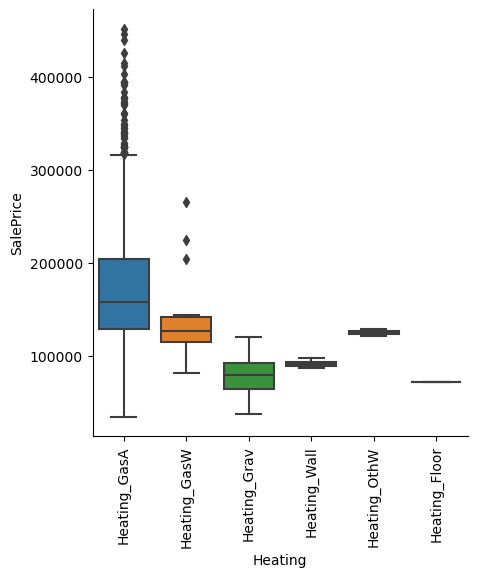

In [124]:
# Map Heating values to ordered integers as follows
df_housing.Heating = df_housing.Heating.apply(lambda x:'Heating_'+x)
plot_concat_var(df_housing, column_name='Heating', target='SalePrice' )#,hue='YrSold'

In [125]:
df_housing = make_dummys(df_housing, 'Heating')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope  BldgType  \
0         65.0     8450      0         3          4          2         0   
1         80.0     9600      0         3          1          2         0   
2         68.0    11250      0         2          4          2         0   
3         60.0     9550      0         2          3          2         0   
4         84.0    14260      0         2          1          2         0   

   HouseStyle  OverallQual  OverallCond  ...  Foundation_CBlock  \
0           3            7            5  ...                  0   
1           0            6            8  ...                  1   
2           3            7            5  ...                  0   
3           3            7            5  ...                  0   
4           3            8            5  ...                  0   

   Foundation_PConc Foundation_Slab  Foundation_Stone  Foundation_Wood  \
0                 1               0                 0                0   
1                 0               0                 0                0   
2                 1               0                 0                0   
3                 0               0                 0                0   
4                 1               0                 0                0   

   Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  
0             1             0             0             0             0  
1             1             0             0             0             0  
2             1             0             0             0             0  
3             1             0             0             0             0  
4             1             0             0             0             0  

[5 rows x 153 columns]

#### CentralAir: 
Central air conditioning

       N	No
       Y	Yes

In [126]:
# Map CentralAir values to ordered integers as follows
df_housing.CentralAir = df_housing.CentralAir.map({'N':0,'Y':1})
df_housing.CentralAir = df_housing.CentralAir.astype(int)
plot_concat_var(df_housing, column_name='CentralAir', target='SalePrice' )#,hue='YrSold'

Null values in CentralAir : 0


#### GarageType: 
Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [127]:
df_housing.GarageType = df_housing.GarageType.fillna('No')
# Map Electrical values to ordered integers as follows
df_housing.GarageType = df_housing.GarageType.apply(lambda x: 'GarageType_'+x)
plot_concat_var(df_housing, column_name='GarageType', target='SalePrice' )#,hue='YrSold'

Null values in GarageType : 0


In [128]:
df_housing = make_dummys(df_housing, 'GarageType')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope  BldgType  \
0         65.0     8450      0         3          4          2         0   
1         80.0     9600      0         3          1          2         0   
2         68.0    11250      0         2          4          2         0   
3         60.0     9550      0         2          3          2         0   
4         84.0    14260      0         2          1          2         0   

   HouseStyle  OverallQual  OverallCond  ...  Heating_GasW  Heating_Grav  \
0           3            7            5  ...             0             0   
1           0            6            8  ...             0             0   
2           3            7            5  ...             0             0   
3           3            7            5  ...             0             0   
4           3            8            5  ...             0             0   

  Heating_OthW  Heating_Wall  GarageType_Attchd  GarageType_Basment  \
0            0             0                  1                   0   
1            0             0                  1                   0   
2            0             0                  1                   0   
3            0             0                  0                   0   
4            0             0                  1                   0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_No  
0                   0                   0                  0              0  
1                   0                   0                  0              0  
2                   0                   0                  0              0  
3                   0                   0                  1              0  
4                   0                   0                  0              0  

[5 rows x 158 columns]

#### MiscFeature: 
Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [129]:
df_housing.MiscFeature = df_housing.MiscFeature.fillna('No')
# Map MiscFeature values to ordered integers as follows
df_housing.MiscFeature = df_housing.MiscFeature.apply(lambda x: 'MiscFeature_'+x)
plot_concat_var(df_housing, column_name='MiscFeature', target='SalePrice' )#,hue='YrSold'

Null values in MiscFeature : 0


In [130]:
df_housing = make_dummys(df_housing, 'MiscFeature')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope  BldgType  \
0         65.0     8450      0         3          4          2         0   
1         80.0     9600      0         3          1          2         0   
2         68.0    11250      0         2          4          2         0   
3         60.0     9550      0         2          3          2         0   
4         84.0    14260      0         2          1          2         0   

   HouseStyle  OverallQual  OverallCond  ...  Heating_Wall  GarageType_Attchd  \
0           3            7            5  ...             0                  1   
1           0            6            8  ...             0                  1   
2           3            7            5  ...             0                  1   
3           3            7            5  ...             0                  0   
4           3            8            5  ...             0                  1   

  GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  0                   0                   0   
3                  0                   0                   0   
4                  0                   0                   0   

   GarageType_Detchd  GarageType_No  MiscFeature_No  MiscFeature_Othr  \
0                  0              0               1                 0   
1                  0              0               1                 0   
2                  0              0               1                 0   
3                  1              0               1                 0   
4                  0              0               1                 0   

   MiscFeature_Shed  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 160 columns]

#### SaleType: 
Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [131]:
# Map MiscFeature values to ordered integers as follows
df_housing.SaleType = df_housing.SaleType.apply(lambda x: 'SaleType_'+x)
plot_concat_var(df_housing, column_name='SaleType', target='SalePrice' )#,hue='YrSold'

Null values in SaleType : 0


In [132]:
df_housing = make_dummys(df_housing, 'SaleType')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope  BldgType  \
0         65.0     8450      0         3          4          2         0   
1         80.0     9600      0         3          1          2         0   
2         68.0    11250      0         2          4          2         0   
3         60.0     9550      0         2          3          2         0   
4         84.0    14260      0         2          1          2         0   

   HouseStyle  OverallQual  OverallCond  ...  MiscFeature_Othr  \
0           3            7            5  ...                 0   
1           0            6            8  ...                 0   
2           3            7            5  ...                 0   
3           3            7            5  ...                 0   
4           3            8            5  ...                 0   

   MiscFeature_Shed SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                 0            0             0               0   
1                 0            0             0               0   
2                 0            0             0               0   
3                 0            0             0               0   
4                 0            0             0               0   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0               0               0             0             0            1  
1               0               0             0             0            1  
2               0               0             0             0            1  
3               0               0             0             0            1  
4               0               0             0             0            1  

[5 rows x 167 columns]

#### SaleCondition: 
Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Null values in SaleCondition : 0


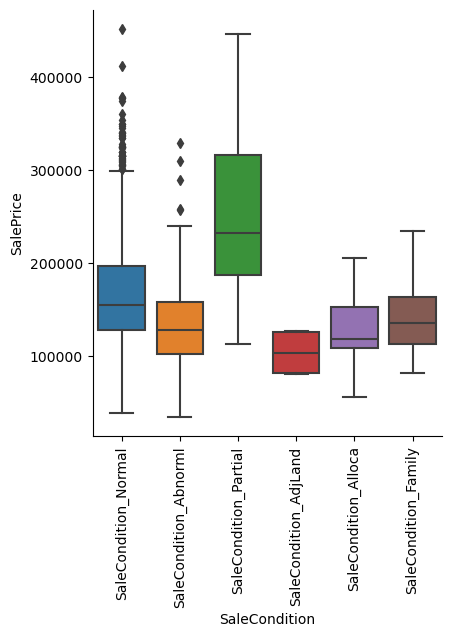

In [133]:
# Map MiscFeature values to ordered integers as follows
df_housing.SaleCondition = df_housing.SaleCondition.apply(lambda x: 'SaleCondition_'+x)
plot_concat_var(df_housing, column_name='SaleCondition', target='SalePrice' )#,hue='YrSold'

In [134]:
df_housing = make_dummys(df_housing, 'SaleCondition')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope  BldgType  \
0         65.0     8450      0         3          4          2         0   
1         80.0     9600      0         3          1          2         0   
2         68.0    11250      0         2          4          2         0   
3         60.0     9550      0         2          3          2         0   
4         84.0    14260      0         2          1          2         0   

   HouseStyle  OverallQual  OverallCond  ...  SaleType_ConLI  SaleType_ConLw  \
0           3            7            5  ...               0               0   
1           0            6            8  ...               0               0   
2           3            7            5  ...               0               0   
3           3            7            5  ...               0               0   
4           3            8            5  ...               0               0   

  SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0            0             0            1                      0   
1            0             0            1                      0   
2            0             0            1                      0   
3            0             0            1                      0   
4            0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 171 columns]

#### MasVnrType: 
Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone


In [135]:
set(df_housing.MasVnrType)
df_housing.MasVnrType.isna().sum()

798

In [136]:
df_housing.MasVnrType = df_housing.MasVnrType.fillna('No')
# Map MiscFeature values to ordered integers as follows
df_housing.MasVnrType = df_housing.MasVnrType.apply(lambda x: 'MasVnrType_'+x)
plot_concat_var(df_housing, column_name='MasVnrType', target='SalePrice' )#,hue='YrSold'

Null values in MasVnrType : 0


In [137]:
df_housing = make_dummys(df_housing, 'MasVnrType')
df_housing.head()

LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope  BldgType  \
0         65.0     8450      0         3          4          2         0   
1         80.0     9600      0         3          1          2         0   
2         68.0    11250      0         2          4          2         0   
3         60.0     9550      0         2          3          2         0   
4         84.0    14260      0         2          1          2         0   

   HouseStyle  OverallQual  OverallCond  ...  SaleType_Oth  SaleType_WD  \
0           3            7            5  ...             0            1   
1           0            6            8  ...             0            1   
2           3            7            5  ...             0            1   
3           3            7            5  ...             0            1   
4           3            8            5  ...             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  MasVnrType_BrkFace  \
0                     1                      0                   1   
1                     1                      0                   0   
2                     1                      0                   1   
3                     0                      0                   0   
4                     1                      0                   1   

   MasVnrType_No  MasVnrType_Stone  
0              0                 0  
1              1                 0  
2              0                 0  
3              1                 0  
4              0                 0  

[5 rows x 173 columns]

In [138]:
df_housing.reset_index()

index  LotFrontage  LotArea  Alley  LotShape  LotConfig  LandSlope  \
0         0         65.0     8450      0         3          4          2   
1         1         80.0     9600      0         3          1          2   
2         2         68.0    11250      0         2          4          2   
3         3         60.0     9550      0         2          3          2   
4         4         84.0    14260      0         2          1          2   
...     ...          ...      ...    ...       ...        ...        ...   
1322   1454         62.0     7500      2         3          4          2   
1323   1455         62.0     7917      0         3          4          2   
1324   1456         85.0    13175      0         3          4          2   
1325   1457         66.0     9042      0         3          4          2   
1326   1458         68.0     9717      0         3          4          2   

      BldgType  HouseStyle  OverallQual  ...  SaleType_Oth  SaleType_WD  \
0            0           3            7  ...             0            1   
1            0           0            6  ...             0            1   
2            0           3            7  ...             0            1   
3            0           3            7  ...             0            1   
4            0           3            8  ...             0            1   
...        ...         ...          ...  ...           ...          ...   
1322         0           0            7  ...             0            1   
1323         0           3            6  ...             0            1   
1324         0           0            6  ...             0            1   
1325         0           3            7  ...             0            1   
1326         0           0            5  ...             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1322                      0                     0                     0   
1323                      0                     0                     0   
1324                      0                     0                     0   
1325                      0                     0                     0   
1326                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  MasVnrType_BrkFace  \
0                        1                      0                   1   
1                        1                      0                   0   
2                        1                      0                   1   
3                        0                      0                   0   
4                        1                      0                   1   
...                    ...                    ...                 ...   
1322                     1                      0                   0   
1323                     1                      0                   0   
1324                     1                      0                   0   
1325                     1                      0                   0   
1326                     1                      0                   0   

      MasVnrType_No  MasVnrType_Stone  
0                 0                 0  
1                 1                 0  
2                 0                 0  
3                 1                 0  
4                 0                 0  
...             ...               ...  
1322              1                 0  
1323              1                 0  
1324              0                 1  
1325          

In [139]:
df_housing.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 1458
Data columns (total 173 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    LotFrontage            1327 non-null   float64
 1    LotArea                1327 non-null   int64  
 2    Alley                  1327 non-null   int32  
 3    LotShape               1327 non-null   int32  
 4    LotConfig              1327 non-null   int32  
 5    LandSlope              1327 non-null   int32  
 6    BldgType               1327 non-null   int32  
 7    HouseStyle             1327 non-null   int32  
 8    OverallQual            1327 non-null   int64  
 9    OverallCond            1327 non-null   int64  
 10   YearBuilt              1327 non-null   int64  
 11   YearRemodAdd           1327 non-null   int64  
 12   MasVnrArea             1327 non-null   float64
 13   ExterQual              1327 non-null   int32  
 14   ExterCond              1327 non-null   int3

In [140]:
df_housing.shape

(1327, 173)

## Bivariate analysis:

In [141]:
continuas_variables = ['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

ordered_numerical = ['SalePrice','Fence', 'Alley', 'LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                     'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                     'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                     'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
                     'GarageQual', 'GarageCond', 'PavedDrive', 'LandSlope', 'Electrical', 'TotRmsAbvGrd','BldgType', 'HouseStyle', 'LotConfig']# MoSold


### Bivariate analysis on continuous variables:

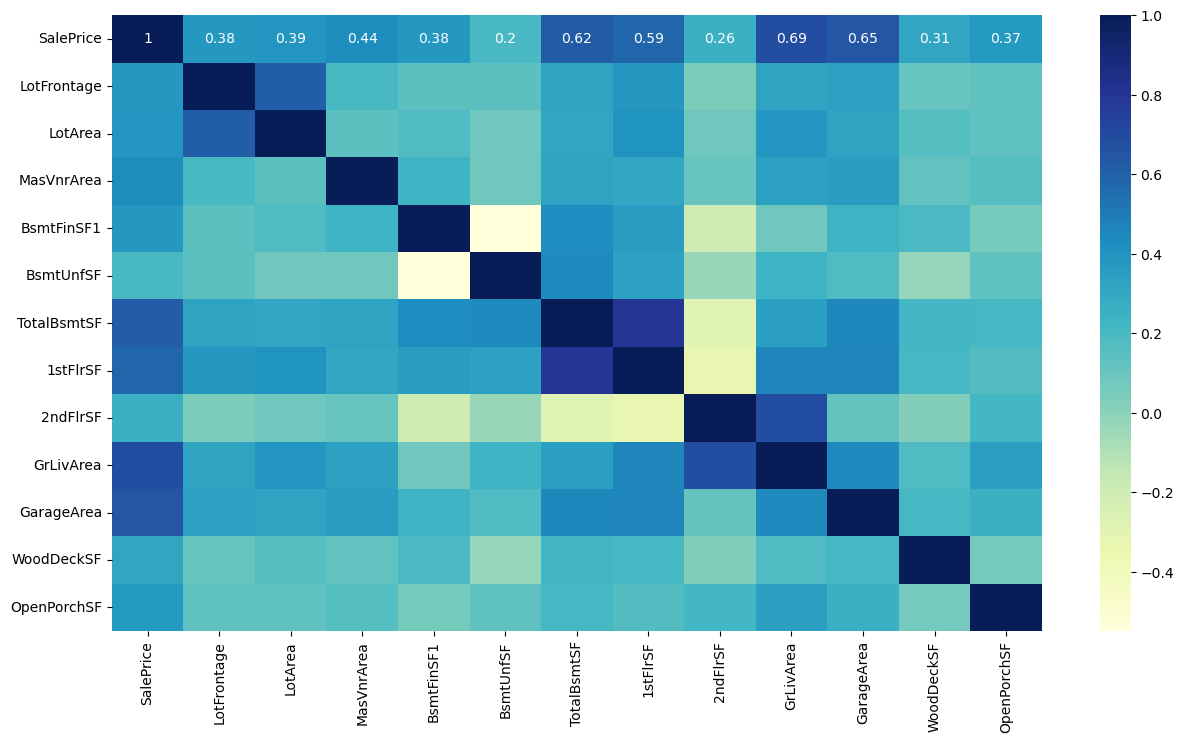

In [142]:

plt.figure(figsize=(15, 8))
corr_continuas_variables = df_housing[continuas_variables].corr()
corr_continuas_variables
sns.heatmap(corr_continuas_variables, annot = True, cmap="YlGnBu")
plt.show()


In [143]:
plt.figure(figsize=(5, 15))
corr_ordered_numerical = df_housing[ordered_numerical].corr()
sns.heatmap(corr_ordered_numerical.loc[:,['SalePrice']], annot = True, cmap="YlGnBu")
plt.show()


## Data split train-test:
Up to now we have analyzed and filtered input data for understanding the relation between independent variables and target variable. Now we can proceed for data separation for training and testing model. as follows.

In [144]:
np.random.seed(0)
df_train, df_test = train_test_split(df_housing, train_size = 0.7, test_size = 0.3, random_state = 90)
df_train = df_train.reset_index()
df_test = df_test.reset_index()

#(df_test.var(axis='columns')==0).sum()

## Scaling train data.
After splitting data to training and test sets, next step is to re-scale available data to normalize model output. Here we are using min-max scaling for out model development as follows.

In [145]:
scaler = MinMaxScaler()
variables_scalling = continuas_variables+ordered_numerical
df_train[variables_scalling] = scaler.fit_transform(df_train[variables_scalling])
# Scalling test data using 
df_test[variables_scalling] = scaler.transform(df_test[variables_scalling])
df_train[variables_scalling].describe()

SalePrice  LotFrontage     LotArea  MasVnrArea  BsmtFinSF1  \
count  928.000000   928.000000  928.000000  928.000000  928.000000   
mean     0.324726     0.451655    0.428399    0.117855    0.247034   
std      0.156873     0.173782    0.179656    0.190897    0.236917   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      0.222468     0.378641    0.322409    0.000000    0.000000   
50%      0.287273     0.466019    0.427802    0.000000    0.225236   
75%      0.395340     0.543689    0.536352    0.202462    0.404481   
max      1.000000     1.000000    1.000000    1.000000    1.000000   

        BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF   GrLivArea  ...  \
count  928.000000   928.000000  928.000000  928.000000  928.000000  ...   
mean     0.256378     0.455289    0.377196    0.214328    0.438880  ...   
std      0.196877     0.170332    0.187266    0.266629    0.191134  ...   
min      0.000000     0.000000    0.000000    0.000000    0.000000  ...   
25%      0.102192     0.351827    0.239460    0.000000    0.292648  ...   
50%      0.221122     0.429409    0.345138    0.000000    0.419284  ...   
75%      0.362211     0.551985    0.492693    0.457143    0.558464  ...   
max      1.000000     1.000000    1.000000    1.000000    1.000000  ...   

       GarageCars  GarageQual  GarageCond  PavedDrive   LandSlope  Electrical  \
count  928.000000  928.000000  928.000000  928.000000  928.000000  928.000000   
mean     0.427263    0.560129    0.559698    0.927802    0.982220    0.970636   
std      0.183135    0.146313    0.146490    0.248323    0.098295    0.105216   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.250000    0.600000    0.600000    1.000000    1.000000    1.000000   
50%      0.500000    0.600000    0.600000    1.000000    1.000000    1.000000   
75%      0.500000    0.600000    0.600000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       TotRmsAbvGrd    BldgType  HouseStyle   LotConfig  
count    928.000000  928.000000  928.000000  928.000000  
mean       0.372965    0.124731    0.235222    0.898438  
std        0.166634    0.280141    0.277270    0.192889  
min        0.000000    0.000000    0.000000    0.000000  
25%        0.222222    0.000000    0.000000    0.750000  
50%        0.333333    0.000000    0.142857    1.000000  
75%        0.444444    0.000000    0.428571    1.000000  
max        1.000000    1.000000    1.000000    1.000000  

[8 rows x 51 columns]

In [146]:
df_test[variables_scalling].describe()

SalePrice  LotFrontage     LotArea  MasVnrArea  BsmtFinSF1  \
count  399.000000   399.000000  399.000000  399.000000  399.000000   
mean     0.336783     0.459206    0.441849    0.127511    0.246303   
std      0.162390     0.163258    0.182127    0.199130    0.253320   
min      0.009574     0.000000   -0.009933    0.000000    0.000000   
25%      0.223668     0.378641    0.335625    0.000000    0.000000   
50%      0.312474     0.466019    0.442393    0.000000    0.200472   
75%      0.417481     0.553398    0.546495    0.238030    0.412441   
max      0.905314     1.000000    1.033896    0.908345    0.970519   

        BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF   GrLivArea  ...  \
count  399.000000   399.000000  399.000000  399.000000  399.000000  ...   
mean     0.276665     0.470804    0.404261    0.202283    0.451561  ...   
std      0.215930     0.176970    0.192242    0.266833    0.190263  ...   
min      0.000000     0.000000   -0.058460    0.000000   -0.045375  ...   
25%      0.105846     0.358142    0.257729    0.000000    0.302138  ...   
50%      0.226308     0.454668    0.376616    0.000000    0.448517  ...   
75%      0.407355     0.586152    0.548061    0.461039    0.564136  ...   
max      0.964639     0.922869    0.994379    1.046104    0.972949  ...   

       GarageCars  GarageQual  GarageCond  PavedDrive   LandSlope  Electrical  \
count  399.000000  399.000000  399.000000  399.000000  399.000000  399.000000   
mean     0.439223    0.557895    0.558897    0.933584    0.971178    0.970551   
std      0.188978    0.148126    0.148408    0.240341    0.121946    0.094994   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.500000   
25%      0.250000    0.600000    0.600000    1.000000    1.000000    1.000000   
50%      0.500000    0.600000    0.600000    1.000000    1.000000    1.000000   
75%      0.500000    0.600000    0.600000    1.000000    1.000000    1.000000   
max      0.750000    0.800000    0.800000    1.000000    1.000000    1.000000   

       TotRmsAbvGrd    BldgType  HouseStyle   LotConfig  
count    399.000000  399.000000  399.000000  399.000000  
mean       0.382066    0.101504    0.233799    0.906015  
std        0.163353    0.259924    0.284302    0.183151  
min       -0.111111    0.000000    0.000000    0.250000  
25%        0.222222    0.000000    0.000000    0.750000  
50%        0.333333    0.000000    0.000000    1.000000  
75%        0.444444    0.000000    0.428571    1.000000  
max        0.888889    1.000000    1.000000    1.000000  

[8 rows x 51 columns]

In [147]:
df_train.describe().transpose()['max'][ df_train.describe().transpose()['max'] > 1]

index    1458.0
Name: max, dtype: float64

### Seperating X and y sets for the model building

In [148]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

## Feature selection:

After preparation of input and output variables we need to select features to train the model.
To do feature selection first we use automatic feature selection algorithm named <b>Recursive feature elimination</b> as follows.

In [149]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('index', False, 119),
 ('LotFrontage', False, 58),
 ('LotArea', True, 1),
 ('Alley', False, 100),
 ('LotShape', False, 71),
 ('LotConfig', False, 106),
 ('LandSlope', True, 1),
 ('BldgType', True, 1),
 ('HouseStyle', False, 53),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 32),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 31),
 ('BsmtQual', True, 1),
 ('BsmtCond', True, 1),
 ('BsmtExposure', False, 16),
 ('BsmtFinType1', False, 118),
 ('BsmtFinSF1', False, 36),
 ('BsmtFinType2', False, 105),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 68),
 ('CentralAir', False, 112),
 ('Electrical', False, 114),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 15),
 ('BsmtFullBath', False, 46),
 ('BsmtHalfBath', False, 107),
 ('FullBath', False, 103),
 ('HalfBath', False, 84),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 62),
 ('KitchenQual', True, 1),
 ('

In [150]:
selected_features_rfe = X_train.columns[rfe.support_]
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]
selected_features_rfe

Index(['LotArea', 'LandSlope', 'BldgType', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
       'KitchenQual', 'Functional', 'GarageCars', 'Neighborhood_Gilbert',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Condition1_PosA',
       'Condition1_RRAe', 'Condition2_RRAe', 'Exterior1st_CemntBd',
       'Exterior1st_Stone', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_Stone', 'Foundation_Slab', 'Foundation_Wood',
       'Heating_OthW', 'Heating_Wall', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_No', 'MiscFeature_No', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'SaleType_Con', 'SaleCondition_AdjLand',
       'SaleCondition_Partial', 'MasVnrType_BrkFace', 'MasVnrType_No',
       'MasVnr

##  Model training:

In [151]:
# Function to compute Varience inflation factor
def compute_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
def assumption1(lm, X,y ):
    # Assumption 1: error terms are narmally distributed
    X_lm = sm.add_constant(X)
    y_pred = lm.predict(X_lm)
    fig = plt.figure()
    sns.distplot((y - y_pred))
    fig.suptitle('Error Terms Normal distribution', fontsize = 10)
    plt.xlabel('Errors', fontsize = 8)
    plt.show()

    # Assumption 2: The error terms should not be dependent on one another.
    sns.scatterplot((y - y_pred))
    fig.suptitle('Error Terms scattered', fontsize = 10)  
    plt.show()
    print("Correlation between residuals and y_train_pred: ",round(y_pred.corr((y - y_pred)), 4))



### Multiple Linear regression:

In [152]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)
# Train model
lm_housing_v1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
# compute VIF for current X_train data
vif = compute_vif(X_train_rfe)
#Let's see the summary of our linear model
print(lm_housing_v1.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     199.5
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        16:47:03   Log-Likelihood:                 1560.8
No. Observations:                 928   AIC:                            -3022.
Df Residuals:                     878   BIC:                            -2780.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.26

In [153]:
assumption1(lm_housing_v1, X_train_rfe,y_train )

Correlation between residuals and y_train_pred:  -0.0


##### MSE nas R2 on test data with MLR:

In [154]:
X_test_lm = sm.add_constant(X_test_rfe)
y_test_pred_lm = lm_housing_v1.predict(X_test_lm)
X_train_lm = sm.add_constant(X_train_rfe)
y_train_pred_lm = lm_housing_v1.predict(X_train_lm)
print("MSE on train data: ", mean_squared_error(y_train,y_train_pred_lm ))
print("R2 score on train data predictions: ", r2_score(y_train, y_train_pred_lm))
print("MSE on test data: ", mean_squared_error(y_test,y_test_pred_lm ))
print("R2 score on test data predictions: ", r2_score(y_test, y_test_pred_lm))

MSE on train data:  0.002025915645338003
R2 score on train data predictions:  0.917587100535144
MSE on test data:  0.003286438488073198
R2 score on test data predictions:  0.8750614913876555


### Ridge Regression

In [155]:
def process_cross_validation(model_name, crossval_params, kpi='neg_mean_absolute_error', number_of_folds=5):
    if model_name == 'Ridge':
        model = Ridge()
    elif model_name == 'Lasso':
        model = Lasso()
    # Process cross validation
    model_crossval = GridSearchCV(estimator = model, 
                            param_grid = crossval_params, 
                            scoring= kpi, 
                            cv = number_of_folds, 
                            return_train_score=True,
                            )            
    model_crossval.fit(X_train_rfe, y_train) 
    return model_crossval

In [156]:
def display_scores(model_crossval,model_name ):
    # display the mean scores
    results_crossval = pd.DataFrame(model_crossval.cv_results_)
    # Limit results to 200 alpha for better visualization
    results_crossval = results_crossval[results_crossval['param_alpha']<200]
    # plotting mean test and train scoes with alpha 
    plt.plot(results_crossval['param_alpha'], results_crossval['mean_train_score'], color='blue')
    plt.plot(results_crossval['param_alpha'], results_crossval['mean_test_score'], color='green')
    plt.xlabel('Alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative MAE Vs Alpha"+model_name)
    plt.legend(['Train score', 'Test score'])
    plt.show()
    return results_crossval

In [157]:
def display_key_features(X_train, model, model_name):
    # Display top importent features and contribution level
    df_coef = pd.DataFrame({'Feature_name':X_train.columns, 'Coeff_value':model.coef_})
    df_coef['Abs_Coeff_value'] = df_coef.Coeff_value.abs()
    df_coef = df_coef.sort_values('Abs_Coeff_value', ascending=False)
    df_coef.reset_index(drop=True, inplace=True)
    # bar plot to determine the variables that would affect pricing most using lasso regression
    #plt.figure(figsize=(10,10))
    sns.barplot(y = 'Feature_name', x='Abs_Coeff_value', data = df_coef.iloc[0:15])
    plt.title("Top 15 features contributing to predict SalePrice"+model_name)
    plt.show()
    return df_coef

In [158]:
def display_mse_r2(model, model_name, X_train,y_train, X_test, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred )
    print("MSE on train data "+model_name+":", mse_train)
    print("R2 score on train data predictions "+model_name+":", r2_score(y_train, y_train_pred))
    print("MSE on test data using ridge "+model_name+":",mse_test)
    print("R2 score on test data predictions "+model_name+":", r2_score(y_test, y_test_pred))
    print("Diff MSE train-test "+model_name+":", abs(mse_test-mse_train))

In [159]:
# Parameters list for grid search cross validation with alpha values for regularization.
crossval_params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 
                    0.1, 0.2 ,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                    20, 30, 40, 50, 
                    100, 200, 500, 1000 ]}
ridge_model_crossval = process_cross_validation("Ridge", crossval_params)

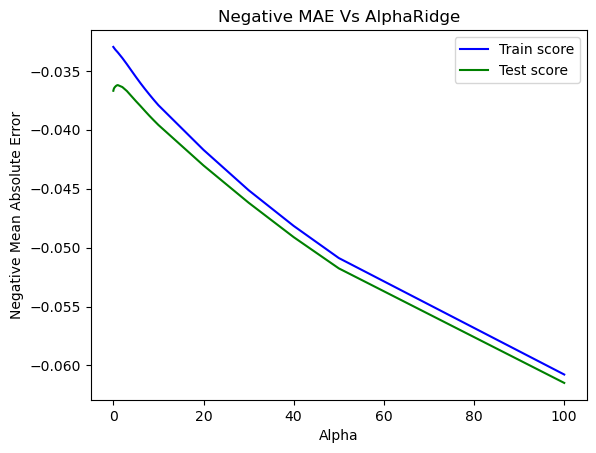

param_alpha  mean_train_score  mean_test_score  rank_test_score
13         1.0         -0.033439        -0.036211                1
12         0.9         -0.033397        -0.036217                2
11         0.8         -0.033354        -0.036232                3
10         0.7         -0.033311        -0.036253                4
9          0.6         -0.033268        -0.036281                5
8          0.5         -0.033225        -0.036317                6
7          0.4         -0.033179        -0.036357                7
14         2.0         -0.033914        -0.036375                8
6          0.3         -0.033128        -0.036402                9
5          0.2         -0.033076        -0.036456               10

In [160]:
results_crossval_ridge = display_scores(ridge_model_crossval,"Ridge" )
results_crossval_ridge[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score']).iloc[0:10]

In [161]:
# get the best estimator for lambda
ridge_model_crossval.best_estimator_

Ridge()

In [162]:
# Compute coefficient values with alpha = 1
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)

Ridge(alpha=1)

##### MSE nas R2 on test data with Ridge:
Compute mean square error on test data.

In [163]:
display_mse_r2(ridge, "Ridge", X_train_rfe,y_train, X_test_rfe, y_test)

MSE on train data Ridge: 0.002077683308769028
R2 score on train data predictions Ridge: 0.9154812264570751
MSE on test data using ridge Ridge: 0.003143668394644553
R2 score on test data predictions Ridge: 0.8804890941290895
Diff MSE train-test Ridge: 0.0010659850858755248


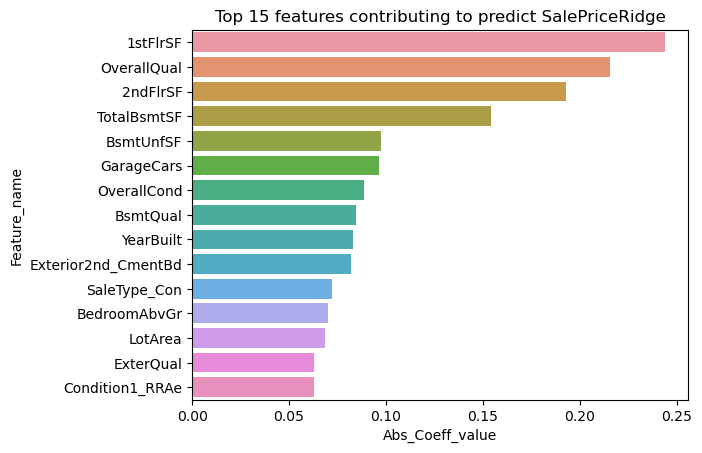

In [164]:
df_ridge_coef = display_key_features(X_train_rfe, ridge, 'Ridge')

### Lasso Regression

In [165]:
# Parameters list for grid search cross validation with alpha values for regularization.
crossval_params = {'alpha':[0.00001,0.00005,0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01 #0.1
                           ]}
lasso_model_crossval = process_cross_validation("Lasso", crossval_params)

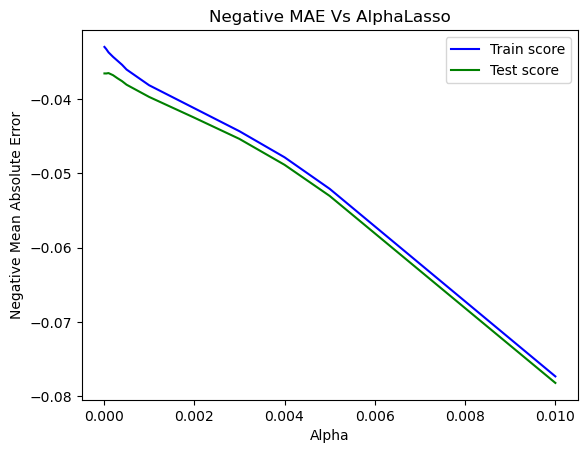

param_alpha  mean_train_score  mean_test_score  rank_test_score
2      0.0001         -0.033737        -0.036529                1
0     0.00001         -0.033009        -0.036575                2
1     0.00005         -0.033300        -0.036581                3
3      0.0002         -0.034340        -0.036810                4
4      0.0003         -0.034875        -0.037230                5
5      0.0004         -0.035411        -0.037615                6
6      0.0005         -0.036051        -0.038091                7
7       0.001         -0.038164        -0.039735                8
8       0.002         -0.041255        -0.042525                9
9       0.003         -0.044347        -0.045382               10

In [166]:
results_crossval_lasso = display_scores(lasso_model_crossval,"Lasso" )
results_crossval_lasso[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score']).iloc[0:10]

In [167]:
# get the best estimator for lambda
lasso_model_crossval.best_estimator_

Lasso(alpha=0.0001)

In [168]:
# Compute coefficient values with alpha = 1
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0001)

##### MSE nas R2 on test data with Lasso:
Compute mean square error on test data.

In [169]:
display_mse_r2(lasso, "Lasso", X_train_rfe,y_train, X_test_rfe, y_test)

MSE on train data Lasso: 0.002131320506308334
R2 score on train data predictions Lasso: 0.9132993009763397
MSE on test data using ridge Lasso: 0.0031572532419723793
R2 score on test data predictions Lasso: 0.8799726473521227
Diff MSE train-test Lasso: 0.001025932735664045


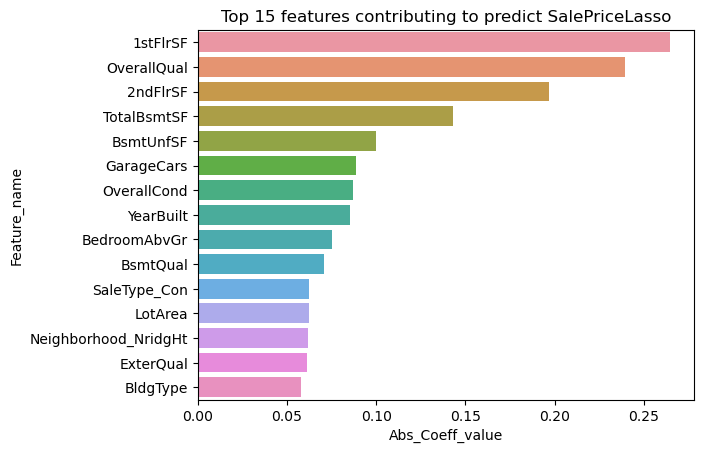

In [172]:
# Display top importent features and contribution level
df_lasso_coef = display_key_features(X_train_rfe, lasso, 'Lasso')

In [173]:
set(df_lasso_coef.Feature_name.iloc[0:15]).intersection(set(df_ridge_coef.Feature_name.iloc[0:15]))

{'1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BldgType',
 'BsmtQual',
 'BsmtUnfSF',
 'ExterQual',
 'GarageCars',
 'LotArea',
 'Neighborhood_NridgHt',
 'OverallCond',
 'OverallQual',
 'SaleType_Con',
 'TotalBsmtSF',
 'YearBuilt'}

## Conclusion :

### The optimal lambda values as below:

Ridge - 1.0
Lasso - 0.0001

### The Mean Squared errors:

#### Ridge:

MSE on train data:  0.002077683308769028<br>
MSE on test data: 0.003143668394644553
Difference in MSE train-test:  0.0010659850858755248

#### Lasso:

MSE on train data:  0.002131320506308334<br>
MSE on test data: 0.0031572532419723793
Difference in MSE train-test:  0.001025932735664045

### R2 scores:

#### Ridge:

Train data predictions:  0.9154812<br>
Test data predictions:  0.8804890

#### Lasso:

Train data predictions:  0.913299<br>
Test data predictions:  0.8799726<br>

The Mean Squared Error difference between train and test is slightly lower for lasso regression compared with ridge.
Lasso helps in feature reduction, So we can prefer Lasso over Ridge.

Top key features contribute predicting the SalePrice from both Ridge and Lasso regression are follows:
 - '1stFlrSF'<br>
 - '2ndFlrSF'<br>
 - 'BedroomAbvGr'<br>
 - 'BsmtQual'<br>
 - 'BsmtUnfSF'<br>
 - 'ExterQual'<br>
 - 'GarageCars'<br>
 - 'LotArea'<br>
 - 'OverallCond'<br>
 - 'OverallQual'<br>
 - 'SaleType_Con'<br>
 - 'TotalBsmtSF'
 - 'YearBuilt'

#### Question 1
Double the lambda value and check the results

In [174]:
# Building Ridge regression with lambda = 2
alpha = 2
ridge_a2 = Ridge(alpha=alpha)
ridge_a2.fit(X_train_rfe, y_train)

Ridge(alpha=2)

In [175]:
# Building Lasso regression with lambda = 0.0002
alpha = 0.0002
lasso_a2e4 = Lasso(alpha=alpha)
lasso_a2e4.fit(X_train_rfe, y_train)

Lasso(alpha=0.0002)

In [176]:
# Display top importent features and contribution level
df_ridge_coef_a2 = display_key_features(X_train_rfe, ridge_a2, 'Ridge')

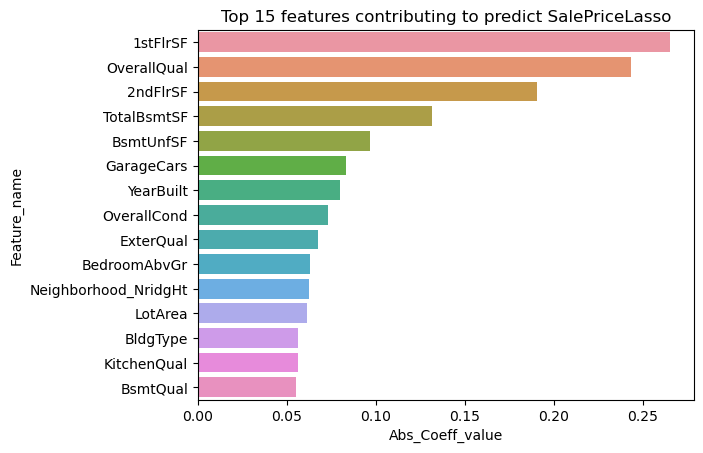

In [177]:
# Display top importent features and contribution level
df_lasso_coef_a2e4 = display_key_features(X_train_rfe, lasso_a2e4, 'Lasso')


In [178]:
display_mse_r2(ridge_a2, "Ridge", X_train_rfe,y_train, X_test_rfe, y_test)

MSE on train data Ridge: 0.0021397051740752507
R2 score on train data predictions Ridge: 0.9129582182746432
MSE on test data using ridge Ridge: 0.003163514609423622
R2 score on test data predictions Ridge: 0.8797346128007166
Diff MSE train-test Ridge: 0.0010238094353483712


In [179]:
display_mse_r2(lasso_a2e4, "Lasso", X_train_rfe,y_train, X_test_rfe, y_test)

MSE on train data Lasso: 0.0022111322108556075
R2 score on train data predictions Lasso: 0.9100526139792235
MSE on test data using ridge Lasso: 0.0031642360758952393
R2 score on test data predictions Lasso: 0.8797071852540563
Diff MSE train-test Lasso: 0.0009531038650396318


In [180]:
set(df_lasso_coef_a2e4.Feature_name.iloc[0:15]).intersection(set(df_ridge_coef_a2.Feature_name.iloc[0:15]))

{'1stFlrSF',
 '2ndFlrSF',
 'BsmtQual',
 'BsmtUnfSF',
 'ExterQual',
 'GarageCars',
 'KitchenQual',
 'LotArea',
 'Neighborhood_NridgHt',
 'OverallCond',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}